In [111]:
'''

## 2019. 6.30.

## updated by 2019. 10.30

'''
%matplotlib inline
%pylab inline

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import KFold

#Parameter 
optimized_file_name = 'train_x_univariate_feature_selection_f_regression.csv'
#raw_dataset = pd.read_csv('test_data_from_yumi.csv')
raw_dataset = pd.read_csv(optimized_file_name)

# Remove "SMILE" column

if 'smile' in raw_dataset.columns:
    raw_dataset = raw_dataset.drop("smile", axis = 1) 

col_list = raw_dataset.columns
# Set for dataSet
raw_array = raw_dataset.values

x_data = raw_array[:,0:-1]
y_data = raw_array[:,[-1]]

# Data Scaling
'''scaler = MinMaxScaler(feature_range=(0, 1)) 
x_data = scaler.fit_transform(x_data)
y_data = scaler.fit_transform(y_data)'''

def get_linear_regresion(x_data, y_data):
    
    X_train, X_eval,y_train,y_eval=train_test_split(x_data,y_data,test_size=0.2,random_state=101)
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    train_y_predicted = reg.predict(X_train)
    y_predicted = reg.predict(X_eval)

    bias = reg.intercept_
    weights = reg.coef_
    mse = mean_squared_error(y_eval, y_predicted)
    r2_value = r2_score(y_eval, y_predicted)
    
    return bias, weights, mse, r2_value

def get_linear_regresion_with_plot(x_data, y_data):
    
    X_train, X_eval,y_train,y_eval=train_test_split(x_data,y_data,test_size=0.2,random_state=101)
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    train_y_predicted = reg.predict(X_train)
    y_predicted = reg.predict(X_eval)

    bias = reg.intercept_
    weights = reg.coef_
    mse = mean_squared_error(y_eval, y_predicted)
    r2_value = r2_score(y_eval, y_predicted)
    
    print("Coefficients: ", reg.coef_)
    print("bias: ", bias)
    print("Mean squared error: %.2f" %mse )
    print('R²: %.2f' %r2_value )
    
    print("== Train Data ")
    print(X_train)
    print("== Test Data ")
    print(X_eval)
    
    print(y_eval.shape,":",y_predicted.shape)
    #fig, ax = plt.subplots()
    plt.scatter(y_eval, y_predicted, c='red', marker = 's', label='Test data')
    plt.scatter(y_train, train_y_predicted, label='Train data')
    #ax.plot([y_eval.min(), y_eval.max()], [y_eval.min(), y_eval.max()], 'k--', lw=4)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('predicted')
    plt.show()

    df = pd.DataFrame({'Actual': y_eval.flatten(), 'Predicted': y_predicted.flatten()})
    print(df)
    df.plot(kind='bar',figsize=(16,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("the comparison of Actual and Predicted values.")
    plt.show()
    
    return bias, weights, mse, r2_value

def make_plot(data_list, plot_title):
    
    max_val = max(data_list)
    #plt.text(str(max_val))
    #print(data_list)
    plt.plot(data_list)
    plt.title(plot_title +": %.2f" %max_val)
    fig= plt.figure(figsize=(16,9))
    plt.show()
    
def make_grid_plot(y_data, pred_data):
    
    data_list.plot(kind='bar',figsize=(16,10))
    y_data.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    pred_data.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("the comparison of Actual and Predicted values.")
    plt.show()

def get_qsar_equation(bias, weights, c_vals, combination_num):
    equation = "y = "
    
    if(combination_num == 1):
        equation += col_list[c_vals[0]]+" * "+str('%.2f' %weights[0]) + " + " + str('%.2f' %bias[0])
         
    else:
        weights = np.squeeze(weights)
        #print("Debug QSAR Equation : ", bias, weights, c_vals)
        for i in range(combination_num):
            equation += col_list[c_vals[i]]+ " * "+str('%.2f' %weights[i]) + " + "
        equation += str('%.2f' %bias[0]) 
    
    return equation

def get_max_values_index(vals_list):
    return values.index(max(vals_list))

def get_optimized_qsar_equation(rank):
    global all_qsar_df
    
    if(rank == 1 and all_qsar_df.shape[0] > 0):
        print(all_qsar_df.iloc[0])
    elif(rank > 1 and all_qsar_df.shape[0] > rank):
        for i in range(rank):
            print(all_qsar_df.iloc[i])
    else:
        print("empty")  
        
        
all_qsar_df = pd.DataFrame(columns=("qsar_equations","r2_vals","mse_vals","c_vals"))

def save_all_vals(qsar_equation, r2_val, mse_val, c_vals):
    
    global all_qsar_df
    row_num = all_qsar_df.shape[0]  
    
    if(row_num <= 10 ):
        #print("row_num : ",row_num)
        all_qsar_df.loc[len(all_qsar_df)]=[qsar_equation, r2_val, mse_val, convert__to_string(c_vals)]
    elif(row_num > 10):
        if(all_qsar_df["r2_vals"].max() < r2_val):
            all_qsar_df.drop(all_qsar_df.tail(1).index)
            all_qsar_df.loc[len(all_qsar_df)]=[qsar_equation, r2_val, mse_val, convert__to_string(c_vals)]
    else :
        print("PASS ###################")
    
    # sort
    all_qsar_df = all_qsar_df.sort_values(["r2_vals"], ascending=[False])
    all_qsar_df.reset_index(drop = True)
    
from sklearn.model_selection import cross_val_predict

def get_cross_validation(x_data, y_data):
    # cross_val_predict returns an array of the same size as `y` where each entry
    # is a prediction obtained by cross validation:
    lr = linear_model.LinearRegression()
    predicted = cross_val_predict(lr, x_data, y_data, cv=10)
    
    fig, ax = plt.subplots()
    ax.scatter(y_data, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title("Cross Validated Prediction Plot")
    plt.show()
    
def convert__to_string(c_vals):
    c_vals_to_string ='-'.join(map(str, c_vals))
    return c_vals_to_string

def get_to_c_vals(c_vals_to_string):
    origine_c_vals = list(map(int, c_vals_to_string.split("-")))
    return origine_c_vals

# Combination

import itertools

def get_linear_regression_with_combination(combination_num, x_data, y_data):

    index_array = np.arange(0, x_data.shape[1], 1)
    #index_array = [0,1,2,3,4,5,6,7,8,9]
    combination_index = list(itertools.combinations(index_array,combination_num))
    
    mse_vals = []
    r2_vals = []
    
    for c_idx, c_vals in enumerate(combination_index):
        if(combination_num == 1):
            a = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,a], y_data)
            
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            mse_vals.append(mse) 
            r2_vals.append(r2_value)
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 2):
            a,b = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b]], y_data)
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 3):
            a,b,c = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b,c]], y_data)
            
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 4):
            a,b,c,d = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b,c,d]], y_data)
            
            #bias, weights, mse, r2_value = get_SVM_linear_regresion(x_data[:,[a,b,c,d]], y_data)
            
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 5):
            a,b,c,d,e = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b,c,d, e]], y_data)
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 6):
            a,b,c,d,e,f = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b,c,d,e,f]], y_data)
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 7):
            a,b,c,d,e,f,g = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b,c,d,e,f,g]], y_data)
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 8):
            a,b,c,d,e,f,g,h = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b,c,d,e,f,g,h]], y_data)
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 9):
            a,b,c,d,e,f,g,h,i = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b,c,d,e,f,g,h,i]], y_data)
            
            qsar_equation = get_qsar_equation(bias, weights, c_vals,combination_num)
            print("QSAR Equation : ",qsar_equation)
            
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
            save_all_vals(qsar_equation,r2_value,mse,c_vals)
            
        elif(combination_num == 10):
            a,b,c,d,e,f,g,h,i,j = c_vals
            print(" ## Step : ", c_idx, c_vals)
            bias, weights, mse, r2_value = get_linear_regresion(x_data[:,[a,b,c,d,e,f,g,h,i,j]], y_data)
            print("QSAR Equation : ",get_qsar_equation(bias, weights, c_vals,combination_num))
            get_stats_summary(x_data[:,[a,b,c,d,e,f,g,h,i,j]], y_data)
            mse_vals.append(mse) 
            r2_vals.append(r2_value) 
            
    if(combination_num != 10):
        make_plot(mse_vals, "Mean Squre Error of Combination" + str(combination_num))
        make_plot(r2_vals, "R2 Scroe of Combination" + str(combination_num))
        #get_max_values_index(r2_vals)
        
# Evaluate metric(s) by cross-validation and also record fit/score times.
def get_cross_validate(x_data, y_data):
    
    lr = linear_model.LinearRegression()
    cv_results = cross_validate(lr, x_data, y_data, cv=3)
    sorted(cv_results.keys())                         
    return cv_results['test_score']    
    
def get_kfold_validation(x_data, y_data):
    
    kfold = KFold(n_splits=5) 
    reg = LinearRegression()
    for n in [3, 5]:
        kfold = KFold(n_splits=n, shuffle=True, random_state=0)
        scores = cross_val_score(reg, x_data, y_data, cv=kfold)
        print('n_splits={}, cross validation score: {}'.format(n, scores))

Populating the interactive namespace from numpy and matplotlib


 ## Step :  0 (0, 1, 2, 3)
QSAR Equation :  y = ALogP * 4.26 + AATS3m * -4.27 + AATS4m * 2.70 + AATS3v * -7.56 + 1550.01
 ## Step :  1 (0, 1, 2, 4)
QSAR Equation :  y = ALogP * 27.17 + AATS3m * -15.33 + AATS4m * 9.16 + AATS4v * -6.82 + 1645.98
 ## Step :  2 (0, 1, 2, 5)
QSAR Equation :  y = ALogP * 27.51 + AATS3m * -17.25 + AATS4m * 6.71 + ATSC3i * 6.13 + 957.16
 ## Step :  3 (0, 1, 2, 6)
QSAR Equation :  y = ALogP * 62.91 + AATS3m * -18.45 + AATS4m * 1.34 + C1SP3 * -12.30 + 1206.16
 ## Step :  4 (0, 1, 2, 7)
QSAR Equation :  y = ALogP * 52.49 + AATS3m * -12.83 + AATS4m * -4.43 + VE3_Dt * -5.30 + 1072.50
 ## Step :  5 (0, 1, 2, 8)
QSAR Equation :  y = ALogP * -3.27 + AATS3m * -5.02 + AATS4m * 3.22 + nHaaCH * 42.84 + -154.07
 ## Step :  6 (0, 1, 2, 9)
QSAR Equation :  y = ALogP * -0.19 + AATS3m * -8.16 + AATS4m * 3.00 + SaaCH * 13.60 + 161.21
 ## Step :  7 (0, 1, 2, 10)
QSAR Equation :  y = ALogP * 12.79 + AATS3m * -12.34 + AATS4m * 3.26 + LipoaffinityIndex * 22.01 + 399.71
 ## Step :  

 ## Step :  114 (0, 2, 6, 13)
QSAR Equation :  y = ALogP * -12.35 + AATS4m * -0.02 + C1SP3 * -2.34 + WTPT-3 * -17.26 + 352.93
 ## Step :  115 (0, 2, 6, 14)
QSAR Equation :  y = ALogP * -35.80 + AATS4m * -0.67 + C1SP3 * 8.40 + XLogP * 39.05 + -157.51
 ## Step :  116 (0, 2, 7, 8)
QSAR Equation :  y = ALogP * 8.98 + AATS4m * -5.06 + VE3_Dt * -3.96 + nHaaCH * 37.85 + -7.37
 ## Step :  117 (0, 2, 7, 9)
QSAR Equation :  y = ALogP * -10.26 + AATS4m * -3.12 + VE3_Dt * -1.83 + SaaCH * 14.67 + -66.76
 ## Step :  118 (0, 2, 7, 10)
QSAR Equation :  y = ALogP * 10.15 + AATS4m * -8.73 + VE3_Dt * -4.45 + LipoaffinityIndex * 17.17 + 275.07
 ## Step :  119 (0, 2, 7, 11)
QSAR Equation :  y = ALogP * -21.81 + AATS4m * 0.53 + VE3_Dt * -2.45 + DELS2 * -11.91 + 212.00
 ## Step :  120 (0, 2, 7, 12)
QSAR Equation :  y = ALogP * 18.90 + AATS4m * -9.66 + VE3_Dt * -5.51 + ETA_dBeta * -5.04 + 490.87
 ## Step :  121 (0, 2, 7, 13)
QSAR Equation :  y = ALogP * 14.73 + AATS4m * -7.61 + VE3_Dt * -4.93 + WTPT-3 * -10.2

 ## Step :  180 (0, 3, 8, 11)
QSAR Equation :  y = ALogP * -9.17 + AATS3v * -6.96 + nHaaCH * -8.87 + DELS2 * -4.39 + 1461.18
 ## Step :  181 (0, 3, 8, 12)
QSAR Equation :  y = ALogP * -6.30 + AATS3v * -4.86 + nHaaCH * 19.28 + ETA_dBeta * -4.44 + 764.42
 ## Step :  182 (0, 3, 8, 13)
QSAR Equation :  y = ALogP * -1.19 + AATS3v * -7.89 + nHaaCH * 41.16 + WTPT-3 * 14.90 + 885.20
 ## Step :  183 (0, 3, 8, 14)
QSAR Equation :  y = ALogP * 4.53 + AATS3v * -11.85 + nHaaCH * -8.98 + XLogP * -10.05 + 2324.21
 ## Step :  184 (0, 3, 9, 10)
QSAR Equation :  y = ALogP * 10.01 + AATS3v * -13.50 + SaaCH * -11.81 + LipoaffinityIndex * 0.88 + 2704.72
 ## Step :  185 (0, 3, 9, 11)
QSAR Equation :  y = ALogP * 20.48 + AATS3v * -17.42 + SaaCH * -17.22 + DELS2 * 2.37 + 3484.00
 ## Step :  186 (0, 3, 9, 12)
QSAR Equation :  y = ALogP * 9.46 + AATS3v * -13.16 + SaaCH * -11.26 + ETA_dBeta * -0.80 + 2639.98
 ## Step :  187 (0, 3, 9, 13)
QSAR Equation :  y = ALogP * 10.94 + AATS3v * -13.89 + SaaCH * -12.11 + WTP

QSAR Equation :  y = ALogP * -27.62 + ATSC3i * 1.96 + C1SP3 * 1.17 + LipoaffinityIndex * 26.77 + -242.36
 ## Step :  248 (0, 5, 6, 11)
QSAR Equation :  y = ALogP * -19.07 + ATSC3i * 0.59 + C1SP3 * -4.83 + DELS2 * -12.13 + 298.08
 ## Step :  249 (0, 5, 6, 12)
QSAR Equation :  y = ALogP * -16.24 + ATSC3i * -4.42 + C1SP3 * -3.20 + ETA_dBeta * -16.98 + -177.68
 ## Step :  250 (0, 5, 6, 13)
QSAR Equation :  y = ALogP * -16.01 + ATSC3i * 5.32 + C1SP3 * 1.14 + WTPT-3 * -16.40 + 486.42
 ## Step :  251 (0, 5, 6, 14)
QSAR Equation :  y = ALogP * -39.24 + ATSC3i * 4.11 + C1SP3 * 10.59 + XLogP * 36.02 + -64.48
 ## Step :  252 (0, 5, 7, 8)
QSAR Equation :  y = ALogP * -7.94 + ATSC3i * 3.84 + VE3_Dt * -1.72 + nHaaCH * 45.43 + -212.58
 ## Step :  253 (0, 5, 7, 9)
QSAR Equation :  y = ALogP * -21.86 + ATSC3i * 1.57 + VE3_Dt * -0.50 + SaaCH * 15.92 + -205.72
 ## Step :  254 (0, 5, 7, 10)
QSAR Equation :  y = ALogP * -22.15 + ATSC3i * 1.83 + VE3_Dt * -1.38 + LipoaffinityIndex * 22.67 + -203.86
 ## Step 

QSAR Equation :  y = ALogP * -19.84 + VE3_Dt * -2.60 + DELS2 * -11.59 + ETA_dBeta * -0.15 + 233.48
 ## Step :  324 (0, 7, 11, 13)
QSAR Equation :  y = ALogP * -19.42 + VE3_Dt * -2.58 + DELS2 * -11.27 + WTPT-3 * -1.02 + 247.94
 ## Step :  325 (0, 7, 11, 14)
QSAR Equation :  y = ALogP * -13.00 + VE3_Dt * -5.31 + DELS2 * -17.42 + XLogP * -25.71 + 443.74
 ## Step :  326 (0, 7, 12, 13)
QSAR Equation :  y = ALogP * -10.92 + VE3_Dt * -1.67 + ETA_dBeta * -9.07 + WTPT-3 * -15.85 + 290.83
 ## Step :  327 (0, 7, 12, 14)
QSAR Equation :  y = ALogP * -24.89 + VE3_Dt * 0.49 + ETA_dBeta * -6.30 + XLogP * 27.28 + -123.20
 ## Step :  328 (0, 7, 13, 14)
QSAR Equation :  y = ALogP * -18.85 + VE3_Dt * -0.76 + WTPT-3 * -8.85 + XLogP * 18.42 + 98.93
 ## Step :  329 (0, 8, 9, 10)
QSAR Equation :  y = ALogP * -19.18 + nHaaCH * 32.20 + SaaCH * 3.55 + LipoaffinityIndex * 19.06 + -486.21
 ## Step :  330 (0, 8, 9, 11)
QSAR Equation :  y = ALogP * -28.33 + nHaaCH * -12.01 + SaaCH * 10.07 + DELS2 * -9.14 + 122.09
 

 ## Step :  447 (1, 3, 5, 13)
QSAR Equation :  y = AATS3m * -1.26 + AATS3v * -8.27 + ATSC3i * 0.75 + WTPT-3 * 2.19 + 1607.82
 ## Step :  448 (1, 3, 5, 14)
QSAR Equation :  y = AATS3m * -1.94 + AATS3v * -6.69 + ATSC3i * 1.45 + XLogP * 1.82 + 1417.78
 ## Step :  449 (1, 3, 6, 7)
QSAR Equation :  y = AATS3m * -2.77 + AATS3v * -6.70 + C1SP3 * 9.94 + VE3_Dt * -4.00 + 1376.11
 ## Step :  450 (1, 3, 6, 8)
QSAR Equation :  y = AATS3m * -1.30 + AATS3v * -10.69 + C1SP3 * 2.70 + nHaaCH * -18.07 + 2205.09
 ## Step :  451 (1, 3, 6, 9)
QSAR Equation :  y = AATS3m * 1.71 + AATS3v * -13.33 + C1SP3 * 1.93 + SaaCH * -9.24 + 2519.79
 ## Step :  452 (1, 3, 6, 10)
QSAR Equation :  y = AATS3m * -2.39 + AATS3v * -6.62 + C1SP3 * 0.79 + LipoaffinityIndex * 7.99 + 1311.09
 ## Step :  453 (1, 3, 6, 11)
QSAR Equation :  y = AATS3m * -2.77 + AATS3v * -3.52 + C1SP3 * -3.57 + DELS2 * -5.95 + 986.62
 ## Step :  454 (1, 3, 6, 12)
QSAR Equation :  y = AATS3m * -1.74 + AATS3v * -7.30 + C1SP3 * 1.14 + ETA_dBeta * -2.61 +

QSAR Equation :  y = AATS3m * -5.89 + AATS4v * -2.11 + WTPT-3 * 3.04 + XLogP * 24.93 + 577.70
 ## Step :  530 (1, 5, 6, 7)
QSAR Equation :  y = AATS3m * -7.51 + ATSC3i * 4.83 + C1SP3 * 14.13 + VE3_Dt * -6.23 + 537.94
 ## Step :  531 (1, 5, 6, 8)
QSAR Equation :  y = AATS3m * -3.20 + ATSC3i * 4.51 + C1SP3 * -1.24 + nHaaCH * 37.62 + 87.44
 ## Step :  532 (1, 5, 6, 9)
QSAR Equation :  y = AATS3m * -6.17 + ATSC3i * 2.77 + C1SP3 * 0.76 + SaaCH * 11.66 + 307.16
 ## Step :  533 (1, 5, 6, 10)
QSAR Equation :  y = AATS3m * -6.90 + ATSC3i * 2.34 + C1SP3 * -0.88 + LipoaffinityIndex * 20.31 + 305.54
 ## Step :  534 (1, 5, 6, 11)
QSAR Equation :  y = AATS3m * -4.31 + ATSC3i * 1.51 + C1SP3 * -5.83 + DELS2 * -8.96 + 549.53
 ## Step :  535 (1, 5, 6, 12)
QSAR Equation :  y = AATS3m * -6.12 + ATSC3i * -0.67 + C1SP3 * -1.78 + ETA_dBeta * -10.26 + 347.59
 ## Step :  536 (1, 5, 6, 13)
QSAR Equation :  y = AATS3m * -4.52 + ATSC3i * 5.11 + C1SP3 * -0.59 + WTPT-3 * -11.17 + 678.67
 ## Step :  537 (1, 5, 6, 14

 ## Step :  602 (1, 7, 9, 12)
QSAR Equation :  y = AATS3m * -5.46 + VE3_Dt * -1.38 + SaaCH * 9.69 + ETA_dBeta * -5.04 + 186.69
 ## Step :  603 (1, 7, 9, 13)
QSAR Equation :  y = AATS3m * -7.39 + VE3_Dt * -0.80 + SaaCH * 20.81 + WTPT-3 * 12.12 + -89.30
 ## Step :  604 (1, 7, 9, 14)
QSAR Equation :  y = AATS3m * -5.28 + VE3_Dt * -1.84 + SaaCH * 15.80 + XLogP * -7.77 + 119.33
 ## Step :  605 (1, 7, 10, 11)
QSAR Equation :  y = AATS3m * -4.36 + VE3_Dt * -3.24 + LipoaffinityIndex * -2.87 + DELS2 * -9.47 + 507.28
 ## Step :  606 (1, 7, 10, 12)
QSAR Equation :  y = AATS3m * -6.31 + VE3_Dt * -1.81 + LipoaffinityIndex * 16.27 + ETA_dBeta * -3.06 + 214.55
 ## Step :  607 (1, 7, 10, 13)
QSAR Equation :  y = AATS3m * -4.93 + VE3_Dt * -1.59 + LipoaffinityIndex * 20.17 + WTPT-3 * -9.11 + 287.97
 ## Step :  608 (1, 7, 10, 14)
QSAR Equation :  y = AATS3m * -6.56 + VE3_Dt * -1.17 + LipoaffinityIndex * 15.95 + XLogP * 9.59 + 214.00
 ## Step :  609 (1, 7, 11, 12)
QSAR Equation :  y = AATS3m * -4.66 + VE3

QSAR Equation :  y = AATS4m * 0.07 + AATS3v * -8.56 + ATSC3i * -2.36 + ETA_dBeta * -5.11 + 1522.14
 ## Step :  667 (2, 3, 5, 13)
QSAR Equation :  y = AATS4m * 0.36 + AATS3v * -10.22 + ATSC3i * -0.23 + WTPT-3 * 4.26 + 1804.37
 ## Step :  668 (2, 3, 5, 14)
QSAR Equation :  y = AATS4m * 4.92 + AATS3v * -14.87 + ATSC3i * -0.54 + XLogP * -25.33 + 2593.71
 ## Step :  669 (2, 3, 6, 7)
QSAR Equation :  y = AATS4m * -3.96 + AATS3v * -6.47 + C1SP3 * 13.07 + VE3_Dt * -5.80 + 1345.67
 ## Step :  670 (2, 3, 6, 8)
QSAR Equation :  y = AATS4m * 0.21 + AATS3v * -11.30 + C1SP3 * 2.13 + nHaaCH * -15.78 + 2215.07
 ## Step :  671 (2, 3, 6, 9)
QSAR Equation :  y = AATS4m * 2.88 + AATS3v * -14.11 + C1SP3 * 2.51 + SaaCH * -11.11 + 2646.71
 ## Step :  672 (2, 3, 6, 10)
QSAR Equation :  y = AATS4m * -0.05 + AATS3v * -8.88 + C1SP3 * 0.80 + LipoaffinityIndex * 1.80 + 1651.53
 ## Step :  673 (2, 3, 6, 11)
QSAR Equation :  y = AATS4m * 1.21 + AATS3v * -12.88 + C1SP3 * 5.43 + DELS2 * 5.00 + 2220.36
 ## Step :  674 

 ## Step :  747 (2, 4, 12, 13)
QSAR Equation :  y = AATS4m * -3.19 + AATS4v * 1.85 + ETA_dBeta * -10.91 + WTPT-3 * -19.57 + 256.90
 ## Step :  748 (2, 4, 12, 14)
QSAR Equation :  y = AATS4m * -5.25 + AATS4v * -1.19 + ETA_dBeta * -4.75 + XLogP * 24.50 + 396.43
 ## Step :  749 (2, 4, 13, 14)
QSAR Equation :  y = AATS4m * -4.81 + AATS4v * -1.91 + WTPT-3 * -2.35 + XLogP * 24.88 + 548.17
 ## Step :  750 (2, 5, 6, 7)
QSAR Equation :  y = AATS4m * -9.13 + ATSC3i * 3.09 + C1SP3 * 19.64 + VE3_Dt * -10.20 + 453.09
 ## Step :  751 (2, 5, 6, 8)
QSAR Equation :  y = AATS4m * -0.91 + ATSC3i * 4.02 + C1SP3 * -3.30 + nHaaCH * 49.26 + -150.98
 ## Step :  752 (2, 5, 6, 9)
QSAR Equation :  y = AATS4m * -4.66 + ATSC3i * 1.42 + C1SP3 * -2.96 + SaaCH * 14.18 + 105.00
 ## Step :  753 (2, 5, 6, 10)
QSAR Equation :  y = AATS4m * -5.56 + ATSC3i * 0.77 + C1SP3 * -5.43 + LipoaffinityIndex * 24.65 + 92.22
 ## Step :  754 (2, 5, 6, 11)
QSAR Equation :  y = AATS4m * -2.59 + ATSC3i * 0.02 + C1SP3 * -9.83 + DELS2 * -1

QSAR Equation :  y = AATS4m * -5.99 + VE3_Dt * -2.40 + ETA_dBeta * -4.73 + XLogP * 18.26 + 237.19
 ## Step :  834 (2, 7, 13, 14)
QSAR Equation :  y = AATS4m * -5.24 + VE3_Dt * -2.81 + WTPT-3 * -6.87 + XLogP * 13.44 + 360.30
 ## Step :  835 (2, 8, 9, 10)
QSAR Equation :  y = AATS4m * -2.85 + nHaaCH * 50.07 + SaaCH * -2.78 + LipoaffinityIndex * 20.05 + -349.73
 ## Step :  836 (2, 8, 9, 11)
QSAR Equation :  y = AATS4m * -3.46 + nHaaCH * 25.10 + SaaCH * 6.43 + DELS2 * -2.78 + -8.05
 ## Step :  837 (2, 8, 9, 12)
QSAR Equation :  y = AATS4m * 1.84 + nHaaCH * 92.25 + SaaCH * -14.81 + ETA_dBeta * -12.61 + -541.00
 ## Step :  838 (2, 8, 9, 13)
QSAR Equation :  y = AATS4m * -1.61 + nHaaCH * 146.20 + SaaCH * 7.98 + WTPT-3 * 44.49 + -1958.87
 ## Step :  839 (2, 8, 9, 14)
QSAR Equation :  y = AATS4m * -4.42 + nHaaCH * 23.87 + SaaCH * 3.50 + XLogP * 13.63 + -17.68
 ## Step :  840 (2, 8, 10, 11)
QSAR Equation :  y = AATS4m * -3.03 + nHaaCH * 64.55 + LipoaffinityIndex * 32.00 + DELS2 * 7.87 + -788.02


QSAR Equation :  y = AATS3v * -12.40 + C1SP3 * 2.94 + nHaaCH * -22.02 + LipoaffinityIndex * -2.93 + 2501.02
 ## Step :  960 (3, 6, 8, 11)
QSAR Equation :  y = AATS3v * -14.12 + C1SP3 * 5.75 + nHaaCH * -19.88 + DELS2 * 3.66 + 2684.09
 ## Step :  961 (3, 6, 8, 12)
QSAR Equation :  y = AATS3v * -15.16 + C1SP3 * 4.28 + nHaaCH * -38.76 + ETA_dBeta * 3.27 + 3106.58
 ## Step :  962 (3, 6, 8, 13)
QSAR Equation :  y = AATS3v * -9.07 + C1SP3 * 0.93 + nHaaCH * 27.59 + WTPT-3 * 12.05 + 1260.08
 ## Step :  963 (3, 6, 8, 14)
QSAR Equation :  y = AATS3v * -11.70 + C1SP3 * 2.11 + nHaaCH * -13.38 + XLogP * -5.41 + 2298.65
 ## Step :  964 (3, 6, 9, 10)
QSAR Equation :  y = AATS3v * -10.49 + C1SP3 * 1.40 + SaaCH * -5.52 + LipoaffinityIndex * 4.00 + 2004.11
 ## Step :  965 (3, 6, 9, 11)
QSAR Equation :  y = AATS3v * -9.31 + C1SP3 * -0.90 + SaaCH * -6.82 + DELS2 * -3.27 + 1924.23
 ## Step :  966 (3, 6, 9, 12)
QSAR Equation :  y = AATS3v * -10.30 + C1SP3 * 1.52 + SaaCH * -4.74 + ETA_dBeta * -1.54 + 1993.52


QSAR Equation :  y = AATS4v * -4.21 + ATSC3i * -1.08 + VE3_Dt * -3.37 + DELS2 * -8.86 + 861.03
 ## Step :  1047 (4, 5, 7, 12)
QSAR Equation :  y = AATS4v * -7.81 + ATSC3i * -16.88 + VE3_Dt * -2.73 + ETA_dBeta * -29.55 + 694.46
 ## Step :  1048 (4, 5, 7, 13)
QSAR Equation :  y = AATS4v * -0.65 + ATSC3i * 3.94 + VE3_Dt * -2.57 + WTPT-3 * -15.33 + 541.87
 ## Step :  1049 (4, 5, 7, 14)
QSAR Equation :  y = AATS4v * -5.30 + ATSC3i * 1.18 + VE3_Dt * -1.81 + XLogP * 12.97 + 872.02
 ## Step :  1050 (4, 5, 8, 9)
QSAR Equation :  y = AATS4v * 1.75 + ATSC3i * 7.62 + nHaaCH * 88.47 + SaaCH * -12.22 + -482.29
 ## Step :  1051 (4, 5, 8, 10)
QSAR Equation :  y = AATS4v * -2.35 + ATSC3i * 1.81 + nHaaCH * 42.58 + LipoaffinityIndex * 11.85 + 43.47
 ## Step :  1052 (4, 5, 8, 11)
QSAR Equation :  y = AATS4v * 1.89 + ATSC3i * 6.47 + nHaaCH * 73.92 + DELS2 * 3.71 + -699.48
 ## Step :  1053 (4, 5, 8, 12)
QSAR Equation :  y = AATS4v * -2.81 + ATSC3i * -7.30 + nHaaCH * 43.16 + ETA_dBeta * -18.15 + -87.05
 ## S

QSAR Equation :  y = AATS4v * -4.58 + nHaaCH * 40.20 + SaaCH * -9.62 + XLogP * 20.41 + 559.70
 ## Step :  1125 (4, 8, 10, 11)
QSAR Equation :  y = AATS4v * -3.17 + nHaaCH * 56.04 + LipoaffinityIndex * 27.42 + DELS2 * 6.37 + -279.38
 ## Step :  1126 (4, 8, 10, 12)
QSAR Equation :  y = AATS4v * -1.26 + nHaaCH * 48.50 + LipoaffinityIndex * 3.00 + ETA_dBeta * -6.81 + -159.14
 ## Step :  1127 (4, 8, 10, 13)
QSAR Equation :  y = AATS4v * -3.49 + nHaaCH * 134.93 + LipoaffinityIndex * 6.23 + WTPT-3 * 37.77 + -1198.01
 ## Step :  1128 (4, 8, 10, 14)
QSAR Equation :  y = AATS4v * -3.05 + nHaaCH * 54.73 + LipoaffinityIndex * 26.98 + XLogP * -18.05 + -77.51
 ## Step :  1129 (4, 8, 11, 12)
QSAR Equation :  y = AATS4v * 3.39 + nHaaCH * 100.79 + DELS2 * 10.84 + ETA_dBeta * -16.50 + -1540.36
 ## Step :  1130 (4, 8, 11, 13)
QSAR Equation :  y = AATS4v * -3.34 + nHaaCH * 156.95 + DELS2 * -0.49 + WTPT-3 * 46.05 + -1475.06
 ## Step :  1131 (4, 8, 11, 14)
QSAR Equation :  y = AATS4v * -3.91 + nHaaCH * 25.5

QSAR Equation :  y = ATSC3i * 4.06 + VE3_Dt * -3.01 + nHaaCH * 60.08 + XLogP * -13.08 + -263.51
 ## Step :  1189 (5, 7, 9, 10)
QSAR Equation :  y = ATSC3i * 2.09 + VE3_Dt * -2.65 + SaaCH * 11.20 + LipoaffinityIndex * 1.47 + -109.71
 ## Step :  1190 (5, 7, 9, 11)
QSAR Equation :  y = ATSC3i * 0.87 + VE3_Dt * -5.13 + SaaCH * -9.39 + DELS2 * -14.69 + 488.33
 ## Step :  1191 (5, 7, 9, 12)
QSAR Equation :  y = ATSC3i * -7.27 + VE3_Dt * -2.78 + SaaCH * 11.63 + ETA_dBeta * -16.17 + -425.57
 ## Step :  1192 (5, 7, 9, 13)
QSAR Equation :  y = ATSC3i * 6.36 + VE3_Dt * -3.00 + SaaCH * -11.02 + WTPT-3 * -25.58 + 873.50
 ## Step :  1193 (5, 7, 9, 14)
QSAR Equation :  y = ATSC3i * 0.68 + VE3_Dt * -3.71 + SaaCH * 25.02 + XLogP * -27.62 + -258.81
 ## Step :  1194 (5, 7, 10, 11)
QSAR Equation :  y = ATSC3i * 2.06 + VE3_Dt * -4.87 + LipoaffinityIndex * -23.47 + DELS2 * -14.75 + 627.41
 ## Step :  1195 (5, 7, 10, 12)
QSAR Equation :  y = ATSC3i * -7.91 + VE3_Dt * -4.18 + LipoaffinityIndex * -8.60 + ETA_d

 ## Step :  1259 (6, 7, 13, 14)
QSAR Equation :  y = C1SP3 * 4.26 + VE3_Dt * -5.05 + WTPT-3 * -18.80 + XLogP * -5.42 + 370.80
 ## Step :  1260 (6, 8, 9, 10)
QSAR Equation :  y = C1SP3 * -5.86 + nHaaCH * 71.10 + SaaCH * -11.26 + LipoaffinityIndex * 23.41 + -543.79
 ## Step :  1261 (6, 8, 9, 11)
QSAR Equation :  y = C1SP3 * -13.29 + nHaaCH * 30.43 + SaaCH * -15.87 + DELS2 * -15.75 + 431.36
 ## Step :  1262 (6, 8, 9, 12)
QSAR Equation :  y = C1SP3 * -4.24 + nHaaCH * 71.36 + SaaCH * -9.66 + ETA_dBeta * -10.37 + -360.14
 ## Step :  1263 (6, 8, 9, 13)
QSAR Equation :  y = C1SP3 * -4.30 + nHaaCH * 158.59 + SaaCH * 4.08 + WTPT-3 * 45.68 + -2088.11
 ## Step :  1264 (6, 8, 9, 14)
QSAR Equation :  y = C1SP3 * -5.30 + nHaaCH * 50.05 + SaaCH * 3.70 + XLogP * -4.02 + -364.34
 ## Step :  1265 (6, 8, 10, 11)
QSAR Equation :  y = C1SP3 * -8.23 + nHaaCH * 28.06 + LipoaffinityIndex * 3.39 + DELS2 * -6.49 + -40.92
 ## Step :  1266 (6, 8, 10, 12)
QSAR Equation :  y = C1SP3 * -4.18 + nHaaCH * 49.96 + Lipoaf

QSAR Equation :  y = nHaaCH * 135.62 + LipoaffinityIndex * 13.53 + WTPT-3 * 28.13 + XLogP * -10.64 + -1617.54
 ## Step :  1346 (8, 11, 12, 13)
QSAR Equation :  y = nHaaCH * 152.76 + DELS2 * 6.63 + ETA_dBeta * -9.28 + WTPT-3 * 31.06 + -1874.24
 ## Step :  1347 (8, 11, 12, 14)
QSAR Equation :  y = nHaaCH * 72.51 + DELS2 * 5.78 + ETA_dBeta * -11.86 + XLogP * -0.99 + -651.08
 ## Step :  1348 (8, 11, 13, 14)
QSAR Equation :  y = nHaaCH * 183.63 + DELS2 * 1.60 + WTPT-3 * 48.96 + XLogP * 2.65 + -2329.96
 ## Step :  1349 (8, 12, 13, 14)
QSAR Equation :  y = nHaaCH * 127.91 + ETA_dBeta * -6.26 + WTPT-3 * 27.32 + XLogP * -4.28 + -1444.39
 ## Step :  1350 (9, 10, 11, 12)
QSAR Equation :  y = SaaCH * 9.99 + LipoaffinityIndex * -12.70 + DELS2 * -5.55 + ETA_dBeta * -7.45 + 122.42
 ## Step :  1351 (9, 10, 11, 13)
QSAR Equation :  y = SaaCH * -21.89 + LipoaffinityIndex * 59.93 + DELS2 * 8.81 + WTPT-3 * -46.89 + 488.34
 ## Step :  1352 (9, 10, 11, 14)
QSAR Equation :  y = SaaCH * 17.22 + LipoaffinityIn

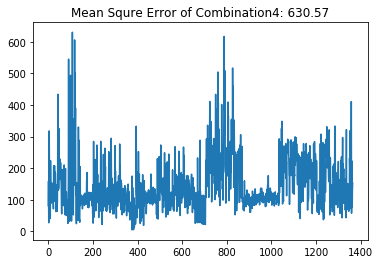

<Figure size 1152x648 with 0 Axes>

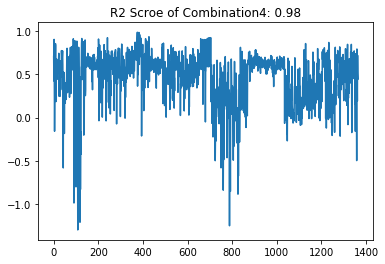

<Figure size 1152x648 with 0 Axes>

In [112]:
get_linear_regression_with_combination(4, x_data, y_data)

 ## Step :  0 (0, 1, 2, 3, 4)
QSAR Equation :  y = ALogP * 5.31 + AATS3m * -4.77 + AATS4m * 3.09 + AATS3v * -7.20 + AATS4v * -0.44 + 1568.88
 ## Step :  1 (0, 1, 2, 3, 5)
QSAR Equation :  y = ALogP * 14.35 + AATS3m * -10.09 + AATS4m * 4.73 + AATS3v * -4.21 + ATSC3i * 3.49 + 1302.81
 ## Step :  2 (0, 1, 2, 3, 6)
QSAR Equation :  y = ALogP * -32.42 + AATS3m * 3.38 + AATS4m * 4.05 + AATS3v * -11.46 + C1SP3 * 8.69 + 1656.49
 ## Step :  3 (0, 1, 2, 3, 7)
QSAR Equation :  y = ALogP * 30.05 + AATS3m * -8.16 + AATS4m * -1.60 + AATS3v * -3.83 + VE3_Dt * -3.07 + 1334.83
 ## Step :  4 (0, 1, 2, 3, 8)
QSAR Equation :  y = ALogP * 22.88 + AATS3m * -9.71 + AATS4m * 3.25 + AATS3v * -10.31 + nHaaCH * -36.58 + 2655.60
 ## Step :  5 (0, 1, 2, 3, 9)
QSAR Equation :  y = ALogP * 11.31 + AATS3m * -2.27 + AATS4m * 2.68 + AATS3v * -13.46 + SaaCH * -12.28 + 2716.15
 ## Step :  6 (0, 1, 2, 3, 10)
QSAR Equation :  y = ALogP * 3.79 + AATS3m * -5.44 + AATS4m * 2.61 + AATS3v * -5.87 + LipoaffinityIndex * 8.10 + 12

QSAR Equation :  y = ALogP * 4.28 + AATS3m * -3.19 + AATS3v * -7.39 + AATS4v * 1.56 + ETA_dBeta * -3.20 + 1329.73
 ## Step :  74 (0, 1, 3, 4, 13)
QSAR Equation :  y = ALogP * 10.61 + AATS3m * -3.75 + AATS3v * -9.39 + AATS4v * 0.59 + WTPT-3 * 5.93 + 1790.81
 ## Step :  75 (0, 1, 3, 4, 14)
QSAR Equation :  y = ALogP * -1.96 + AATS3m * 2.73 + AATS3v * -16.27 + AATS4v * 3.88 + XLogP * -21.69 + 2304.11
 ## Step :  76 (0, 1, 3, 5, 6)
QSAR Equation :  y = ALogP * 109.63 + AATS3m * -30.66 + AATS3v * 7.65 + ATSC3i * 6.83 + C1SP3 * -20.28 + 907.92
 ## Step :  77 (0, 1, 3, 5, 7)
QSAR Equation :  y = ALogP * 53.45 + AATS3m * -17.96 + AATS3v * 2.23 + ATSC3i * 4.88 + VE3_Dt * -4.17 + 903.63
 ## Step :  78 (0, 1, 3, 5, 8)
QSAR Equation :  y = ALogP * 19.29 + AATS3m * -6.34 + AATS3v * -9.47 + ATSC3i * 0.52 + nHaaCH * -26.48 + 2400.16
 ## Step :  79 (0, 1, 3, 5, 9)
QSAR Equation :  y = ALogP * 12.74 + AATS3m * -2.07 + AATS3v * -11.10 + ATSC3i * 1.17 + SaaCH * -8.83 + 2391.80
 ## Step :  80 (0, 1, 3, 5,

QSAR Equation :  y = ALogP * -2.59 + AATS3m * -5.97 + AATS4v * 0.14 + SaaCH * 10.20 + LipoaffinityIndex * 14.54 + 58.90
 ## Step :  152 (0, 1, 4, 9, 11)
QSAR Equation :  y = ALogP * -39.79 + AATS3m * 2.13 + AATS4v * 2.32 + SaaCH * 10.96 + DELS2 * -9.46 + -499.73
 ## Step :  153 (0, 1, 4, 9, 12)
QSAR Equation :  y = ALogP * -4.93 + AATS3m * -6.35 + AATS4v * 3.05 + SaaCH * 14.89 + ETA_dBeta * -5.90 + -334.38
 ## Step :  154 (0, 1, 4, 9, 13)
QSAR Equation :  y = ALogP * 10.28 + AATS3m * -11.25 + AATS4v * 1.09 + SaaCH * 24.84 + WTPT-3 * 17.65 + -180.50
 ## Step :  155 (0, 1, 4, 9, 14)
QSAR Equation :  y = ALogP * -23.19 + AATS3m * -3.51 + AATS4v * 5.89 + SaaCH * 33.89 + XLogP * -19.97 + -1203.25
 ## Step :  156 (0, 1, 4, 10, 11)
QSAR Equation :  y = ALogP * 48.90 + AATS3m * -15.96 + AATS4v * -5.10 + LipoaffinityIndex * 33.86 + DELS2 * 8.87 + 1362.73
 ## Step :  157 (0, 1, 4, 10, 12)
QSAR Equation :  y = ALogP * 15.40 + AATS3m * -8.63 + AATS4v * -3.10 + LipoaffinityIndex * 19.91 + ETA_dBeta

QSAR Equation :  y = ALogP * 366.17 + AATS3m * -83.82 + C1SP3 * -64.22 + nHaaCH * -156.79 + XLogP * -44.10 + 7145.43
 ## Step :  215 (0, 1, 6, 9, 10)
QSAR Equation :  y = ALogP * -8.91 + AATS3m * -4.80 + C1SP3 * 1.41 + SaaCH * 11.31 + LipoaffinityIndex * 14.74 + -20.92
 ## Step :  216 (0, 1, 6, 9, 11)
QSAR Equation :  y = ALogP * 1.99 + AATS3m * -4.19 + C1SP3 * -8.00 + SaaCH * -1.70 + DELS2 * -10.91 + 574.03
 ## Step :  217 (0, 1, 6, 9, 12)
QSAR Equation :  y = ALogP * 110.41 + AATS3m * -25.87 + C1SP3 * -21.12 + SaaCH * -12.92 + ETA_dBeta * -8.84 + 1997.88
 ## Step :  218 (0, 1, 6, 9, 13)
QSAR Equation :  y = ALogP * 36.52 + AATS3m * -15.78 + C1SP3 * -4.42 + SaaCH * 19.48 + WTPT-3 * 19.10 + 377.90
 ## Step :  219 (0, 1, 6, 9, 14)
QSAR Equation :  y = ALogP * -40.84 + AATS3m * 1.00 + C1SP3 * 8.68 + SaaCH * 16.42 + XLogP * 12.58 + -413.04
 ## Step :  220 (0, 1, 6, 10, 11)
QSAR Equation :  y = ALogP * 10.56 + AATS3m * -6.73 + C1SP3 * -7.05 + LipoaffinityIndex * 6.46 + DELS2 * -6.90 + 557.

QSAR Equation :  y = ALogP * -21.55 + AATS3m * -0.23 + LipoaffinityIndex * 20.01 + DELS2 * -3.28 + WTPT-3 * -10.94 + 93.61
 ## Step :  278 (0, 1, 10, 11, 14)
QSAR Equation :  y = ALogP * -31.54 + AATS3m * 1.28 + LipoaffinityIndex * 0.76 + DELS2 * -10.64 + XLogP * 9.28 + 96.22
 ## Step :  279 (0, 1, 10, 12, 13)
QSAR Equation :  y = ALogP * -8.02 + AATS3m * -2.95 + LipoaffinityIndex * 16.33 + ETA_dBeta * -4.48 + WTPT-3 * -12.54 + 266.08
 ## Step :  280 (0, 1, 10, 12, 14)
QSAR Equation :  y = ALogP * 11.33 + AATS3m * -8.62 + LipoaffinityIndex * -3.44 + ETA_dBeta * -7.38 + XLogP * 18.01 + 521.56
 ## Step :  281 (0, 1, 10, 13, 14)
QSAR Equation :  y = ALogP * -29.72 + AATS3m * 3.27 + LipoaffinityIndex * 43.06 + WTPT-3 * -26.81 + XLogP * -23.39 + -40.43
 ## Step :  282 (0, 1, 11, 12, 13)
QSAR Equation :  y = ALogP * -27.40 + AATS3m * 1.70 + DELS2 * -8.01 + ETA_dBeta * -4.51 + WTPT-3 * -8.58 + 219.85
 ## Step :  283 (0, 1, 11, 12, 14)
QSAR Equation :  y = ALogP * 47.16 + AATS3m * -17.21 + DEL

QSAR Equation :  y = ALogP * 18.69 + AATS4m * -10.05 + AATS4v * 2.29 + VE3_Dt * -5.70 + WTPT-3 * -11.80 + 384.21
 ## Step :  364 (0, 2, 4, 7, 14)
QSAR Equation :  y = ALogP * 2.28 + AATS4m * -6.75 + AATS4v * -0.39 + VE3_Dt * -2.72 + XLogP * 20.64 + 343.70
 ## Step :  365 (0, 2, 4, 8, 9)
QSAR Equation :  y = ALogP * -29.89 + AATS4m * -3.60 + AATS4v * 5.95 + nHaaCH * -8.81 + SaaCH * 28.14 + -1171.73
 ## Step :  366 (0, 2, 4, 8, 10)
QSAR Equation :  y = ALogP * -20.34 + AATS4m * 2.32 + AATS4v * -1.79 + nHaaCH * 38.20 + LipoaffinityIndex * 20.43 + -317.36
 ## Step :  367 (0, 2, 4, 8, 11)
QSAR Equation :  y = ALogP * -40.04 + AATS4m * 6.82 + AATS4v * -2.79 + nHaaCH * -2.92 + DELS2 * -13.75 + 399.75
 ## Step :  368 (0, 2, 4, 8, 12)
QSAR Equation :  y = ALogP * -20.98 + AATS4m * 2.82 + AATS4v * 1.53 + nHaaCH * 56.17 + ETA_dBeta * -9.57 + -833.43
 ## Step :  369 (0, 2, 4, 8, 13)
QSAR Equation :  y = ALogP * -9.30 + AATS4m * 5.90 + AATS4v * -5.92 + nHaaCH * 185.52 + WTPT-3 * 56.82 + -1803.34
 #

QSAR Equation :  y = ALogP * -10.43 + AATS4m * -7.54 + C1SP3 * 17.67 + VE3_Dt * -7.39 + XLogP * 20.88 + 217.78
 ## Step :  429 (0, 2, 6, 8, 9)
QSAR Equation :  y = ALogP * -81.83 + AATS4m * 6.18 + C1SP3 * 20.07 + nHaaCH * -51.47 + SaaCH * 42.81 + -742.92
 ## Step :  430 (0, 2, 6, 8, 10)
QSAR Equation :  y = ALogP * -26.16 + AATS4m * 2.26 + C1SP3 * 2.01 + nHaaCH * 44.26 + LipoaffinityIndex * 21.77 + -680.38
 ## Step :  431 (0, 2, 6, 8, 11)
QSAR Equation :  y = ALogP * -36.02 + AATS4m * 4.60 + C1SP3 * -1.99 + nHaaCH * 3.94 + DELS2 * -13.60 + 13.83
 ## Step :  432 (0, 2, 6, 8, 12)
QSAR Equation :  y = ALogP * -27.36 + AATS4m * 4.75 + C1SP3 * 2.89 + nHaaCH * 54.31 + ETA_dBeta * -9.44 + -684.69
 ## Step :  433 (0, 2, 6, 8, 13)
QSAR Equation :  y = ALogP * -2.94 + AATS4m * 1.16 + C1SP3 * -4.03 + nHaaCH * 168.05 + WTPT-3 * 44.76 + -2144.03
 ## Step :  434 (0, 2, 6, 8, 14)
QSAR Equation :  y = ALogP * -29.99 + AATS4m * 0.38 + C1SP3 * 5.75 + nHaaCH * 19.67 + XLogP * 27.36 + -296.26
 ## Step :  

QSAR Equation :  y = ALogP * -24.70 + AATS4m * -0.19 + SaaCH * 13.92 + LipoaffinityIndex * 12.59 + ETA_dBeta * -1.03 + -344.86
 ## Step :  488 (0, 2, 9, 10, 13)
QSAR Equation :  y = ALogP * -23.48 + AATS4m * 1.11 + SaaCH * -1.74 + LipoaffinityIndex * 28.00 + WTPT-3 * -16.95 + 10.68
 ## Step :  489 (0, 2, 9, 10, 14)
QSAR Equation :  y = ALogP * -30.87 + AATS4m * 1.94 + SaaCH * 24.67 + LipoaffinityIndex * 21.28 + XLogP * -24.97 + -624.11
 ## Step :  490 (0, 2, 9, 11, 12)
QSAR Equation :  y = ALogP * -38.78 + AATS4m * 4.52 + SaaCH * 4.52 + DELS2 * -11.21 + ETA_dBeta * -1.28 + -87.26
 ## Step :  491 (0, 2, 9, 11, 13)
QSAR Equation :  y = ALogP * -39.72 + AATS4m * 4.63 + SaaCH * 4.67 + DELS2 * -11.95 + WTPT-3 * 0.46 + -86.00
 ## Step :  492 (0, 2, 9, 11, 14)
QSAR Equation :  y = ALogP * -46.28 + AATS4m * 7.21 + SaaCH * 11.76 + DELS2 * -13.77 + XLogP * -18.59 + -220.13
 ## Step :  493 (0, 2, 9, 12, 13)
QSAR Equation :  y = ALogP * -21.67 + AATS4m * 3.82 + SaaCH * -4.97 + ETA_dBeta * -12.65 +

 ## Step :  573 (0, 3, 5, 9, 11)
QSAR Equation :  y = ALogP * 17.29 + AATS3v * -16.12 + ATSC3i * 0.53 + SaaCH * -15.71 + DELS2 * 1.72 + 3246.54
 ## Step :  574 (0, 3, 5, 9, 12)
QSAR Equation :  y = ALogP * 22.90 + AATS3v * -18.49 + ATSC3i * 4.83 + SaaCH * -22.97 + ETA_dBeta * 7.84 + 3992.20
 ## Step :  575 (0, 3, 5, 9, 13)
QSAR Equation :  y = ALogP * 11.75 + AATS3v * -13.56 + ATSC3i * 1.05 + SaaCH * -14.48 + WTPT-3 * -2.40 + 2849.24
 ## Step :  576 (0, 3, 5, 9, 14)
QSAR Equation :  y = ALogP * 11.84 + AATS3v * -14.02 + ATSC3i * 0.35 + SaaCH * -10.89 + XLogP * -4.49 + 2826.67
 ## Step :  577 (0, 3, 5, 10, 11)
QSAR Equation :  y = ALogP * -10.85 + AATS3v * -5.55 + ATSC3i * 0.51 + LipoaffinityIndex * 3.38 + DELS2 * -3.65 + 1097.79
 ## Step :  578 (0, 3, 5, 10, 12)
QSAR Equation :  y = ALogP * -2.33 + AATS3v * -8.25 + ATSC3i * -3.42 + LipoaffinityIndex * -2.69 + ETA_dBeta * -7.85 + 1451.74
 ## Step :  579 (0, 3, 5, 10, 13)
QSAR Equation :  y = ALogP * -78.76 + AATS3v * 30.84 + ATSC3i * 8.

QSAR Equation :  y = ALogP * 24.65 + AATS3v * -21.67 + nHaaCH * -70.30 + SaaCH * -25.75 + WTPT-3 * -22.51 + 5417.36
 ## Step :  640 (0, 3, 8, 9, 14)
QSAR Equation :  y = ALogP * 12.42 + AATS3v * -14.67 + nHaaCH * -4.51 + SaaCH * -9.90 + XLogP * -6.13 + 2961.00
 ## Step :  641 (0, 3, 8, 10, 11)
QSAR Equation :  y = ALogP * -10.58 + AATS3v * -5.75 + nHaaCH * 0.25 + LipoaffinityIndex * 4.48 + DELS2 * -3.39 + 1101.28
 ## Step :  642 (0, 3, 8, 10, 12)
QSAR Equation :  y = ALogP * -16.34 + AATS3v * 1.29 + nHaaCH * 50.20 + LipoaffinityIndex * 12.66 + ETA_dBeta * -5.49 + -744.96
 ## Step :  643 (0, 3, 8, 10, 13)
QSAR Equation :  y = ALogP * 0.13 + AATS3v * -8.37 + nHaaCH * 44.75 + LipoaffinityIndex * -1.80 + WTPT-3 * 17.09 + 924.72
 ## Step :  644 (0, 3, 8, 10, 14)
QSAR Equation :  y = ALogP * -3.40 + AATS3v * -7.06 + nHaaCH * 16.99 + LipoaffinityIndex * 13.59 + XLogP * -12.74 + 1108.36
 ## Step :  645 (0, 3, 8, 11, 12)
QSAR Equation :  y = ALogP * -9.44 + AATS3v * -5.58 + nHaaCH * 2.73 + DELS

QSAR Equation :  y = ALogP * -16.95 + AATS4v * -6.68 + C1SP3 * 23.95 + VE3_Dt * -8.50 + nHaaCH * 18.25 + 831.61
 ## Step :  708 (0, 4, 6, 7, 9)
QSAR Equation :  y = ALogP * -31.73 + AATS4v * -3.54 + C1SP3 * 23.32 + VE3_Dt * -6.93 + SaaCH * 12.55 + 253.20
 ## Step :  709 (0, 4, 6, 7, 10)
QSAR Equation :  y = ALogP * -22.77 + AATS4v * -8.05 + C1SP3 * 25.27 + VE3_Dt * -8.01 + LipoaffinityIndex * 14.29 + 1034.36
 ## Step :  710 (0, 4, 6, 7, 11)
QSAR Equation :  y = ALogP * -22.05 + AATS4v * -4.05 + C1SP3 * 15.63 + VE3_Dt * -6.50 + DELS2 * -7.45 + 731.59
 ## Step :  711 (0, 4, 6, 7, 12)
QSAR Equation :  y = ALogP * -19.54 + AATS4v * -8.28 + C1SP3 * 27.68 + VE3_Dt * -9.42 + ETA_dBeta * -2.87 + 1198.18
 ## Step :  712 (0, 4, 6, 7, 13)
QSAR Equation :  y = ALogP * -18.75 + AATS4v * -8.11 + C1SP3 * 27.53 + VE3_Dt * -9.52 + WTPT-3 * -3.19 + 1242.51
 ## Step :  713 (0, 4, 6, 7, 14)
QSAR Equation :  y = ALogP * -27.48 + AATS4v * -6.96 + C1SP3 * 26.58 + VE3_Dt * -7.53 + XLogP * 16.63 + 937.77
 ## S

QSAR Equation :  y = ALogP * -32.26 + AATS4v * 2.12 + SaaCH * 13.99 + DELS2 * -7.91 + WTPT-3 * 3.92 + -483.42
 ## Step :  777 (0, 4, 9, 11, 14)
QSAR Equation :  y = ALogP * -37.52 + AATS4v * 5.48 + SaaCH * 26.62 + DELS2 * -6.92 + XLogP * -19.39 + -1109.05
 ## Step :  778 (0, 4, 9, 12, 13)
QSAR Equation :  y = ALogP * -26.19 + AATS4v * 5.15 + SaaCH * 6.30 + ETA_dBeta * -11.09 + WTPT-3 * -17.95 + -621.02
 ## Step :  779 (0, 4, 9, 12, 14)
QSAR Equation :  y = ALogP * -43.66 + AATS4v * 9.33 + SaaCH * 44.12 + ETA_dBeta * -5.17 + XLogP * -32.37 + -2135.56
 ## Step :  780 (0, 4, 9, 13, 14)
QSAR Equation :  y = ALogP * -53.75 + AATS4v * 11.42 + SaaCH * 67.08 + WTPT-3 * 11.35 + XLogP * -50.80 + -2989.77
 ## Step :  781 (0, 4, 10, 11, 12)
QSAR Equation :  y = ALogP * -23.32 + AATS4v * -1.49 + LipoaffinityIndex * 9.08 + DELS2 * -9.50 + ETA_dBeta * 0.59 + 354.56
 ## Step :  782 (0, 4, 10, 11, 13)
QSAR Equation :  y = ALogP * -22.17 + AATS4v * -0.15 + LipoaffinityIndex * 19.61 + DELS2 * -3.50 + WTP

QSAR Equation :  y = ALogP * -29.32 + ATSC3i * 11.40 + LipoaffinityIndex * 22.64 + DELS2 * -10.29 + ETA_dBeta * 22.17 + 380.06
 ## Step :  866 (0, 5, 10, 11, 13)
QSAR Equation :  y = ALogP * -20.93 + ATSC3i * 1.69 + LipoaffinityIndex * 17.27 + DELS2 * -2.65 + WTPT-3 * -11.85 + 164.98
 ## Step :  867 (0, 5, 10, 11, 14)
QSAR Equation :  y = ALogP * -25.18 + ATSC3i * 1.81 + LipoaffinityIndex * -2.16 + DELS2 * -8.88 + XLogP * 11.38 + 222.57
 ## Step :  868 (0, 5, 10, 12, 13)
QSAR Equation :  y = ALogP * -18.03 + ATSC3i * -1.70 + LipoaffinityIndex * 15.39 + ETA_dBeta * -7.75 + WTPT-3 * -15.91 + 88.54
 ## Step :  869 (0, 5, 10, 12, 14)
QSAR Equation :  y = ALogP * -19.09 + ATSC3i * -10.24 + LipoaffinityIndex * -29.94 + ETA_dBeta * -29.79 + XLogP * 37.54 + -216.35
 ## Step :  870 (0, 5, 10, 13, 14)
QSAR Equation :  y = ALogP * -18.37 + ATSC3i * 1.29 + LipoaffinityIndex * 32.03 + WTPT-3 * -19.85 + XLogP * -13.44 + 153.98
 ## Step :  871 (0, 5, 11, 12, 13)
QSAR Equation :  y = ALogP * -6.87 + A

QSAR Equation :  y = ALogP * -9.76 + C1SP3 * -4.88 + LipoaffinityIndex * 44.78 + WTPT-3 * -26.46 + XLogP * -32.16 + 208.22
 ## Step :  927 (0, 6, 11, 12, 13)
QSAR Equation :  y = ALogP * -17.72 + C1SP3 * -3.81 + DELS2 * -9.47 + ETA_dBeta * -2.74 + WTPT-3 * -4.46 + 303.01
 ## Step :  928 (0, 6, 11, 12, 14)
QSAR Equation :  y = ALogP * -15.88 + C1SP3 * -7.30 + DELS2 * -14.05 + ETA_dBeta * 0.15 + XLogP * -5.61 + 354.54
 ## Step :  929 (0, 6, 11, 13, 14)
QSAR Equation :  y = ALogP * -14.67 + C1SP3 * -7.52 + DELS2 * -13.70 + WTPT-3 * -1.70 + XLogP * -7.04 + 387.75
 ## Step :  930 (0, 6, 12, 13, 14)
QSAR Equation :  y = ALogP * -26.13 + C1SP3 * 5.02 + ETA_dBeta * -7.88 + WTPT-3 * -9.59 + XLogP * 18.49 + 80.42
 ## Step :  931 (0, 7, 8, 9, 10)
QSAR Equation :  y = ALogP * -12.84 + VE3_Dt * -1.35 + nHaaCH * 45.68 + SaaCH * -2.26 + LipoaffinityIndex * 18.92 + -496.17
 ## Step :  932 (0, 7, 8, 9, 11)
QSAR Equation :  y = ALogP * -15.61 + VE3_Dt * -3.29 + nHaaCH * 12.30 + SaaCH * -6.04 + DELS2 * -

QSAR Equation :  y = ALogP * -24.97 + SaaCH * 6.41 + DELS2 * -7.25 + ETA_dBeta * -2.07 + XLogP * 3.01 + 37.26
 ## Step :  994 (0, 9, 11, 13, 14)
QSAR Equation :  y = ALogP * -27.26 + SaaCH * 11.08 + DELS2 * -8.34 + WTPT-3 * 4.24 + XLogP * -0.77 + -78.89
 ## Step :  995 (0, 9, 12, 13, 14)
QSAR Equation :  y = ALogP * -9.89 + SaaCH * -23.52 + ETA_dBeta * -14.32 + WTPT-3 * -28.39 + XLogP * 27.34 + 802.59
 ## Step :  996 (0, 10, 11, 12, 13)
QSAR Equation :  y = ALogP * -19.53 + LipoaffinityIndex * 16.20 + DELS2 * -1.42 + ETA_dBeta * -3.84 + WTPT-3 * -13.77 + 128.20
 ## Step :  997 (0, 10, 11, 12, 14)
QSAR Equation :  y = ALogP * -24.69 + LipoaffinityIndex * -5.63 + DELS2 * -8.69 + ETA_dBeta * -3.59 + XLogP * 13.21 + 184.35
 ## Step :  998 (0, 10, 11, 13, 14)
QSAR Equation :  y = ALogP * -2.49 + LipoaffinityIndex * 115.62 + DELS2 * 23.25 + WTPT-3 * -66.37 + XLogP * -68.70 + -110.51
 ## Step :  999 (0, 10, 12, 13, 14)
QSAR Equation :  y = ALogP * -18.09 + LipoaffinityIndex * 29.30 + ETA_dBet

 ## Step :  1076 (1, 2, 4, 7, 11)
QSAR Equation :  y = AATS3m * -5.02 + AATS4m * 1.41 + AATS4v * -1.37 + VE3_Dt * -2.63 + DELS2 * -8.21 + 646.12
 ## Step :  1077 (1, 2, 4, 7, 12)
QSAR Equation :  y = AATS3m * -10.85 + AATS4m * 9.61 + AATS4v * -4.50 + VE3_Dt * 0.12 + ETA_dBeta * -7.92 + 904.99
 ## Step :  1078 (1, 2, 4, 7, 13)
QSAR Equation :  y = AATS3m * -6.15 + AATS4m * 4.08 + AATS4v * -3.37 + VE3_Dt * -1.66 + WTPT-3 * -6.48 + 851.51
 ## Step :  1079 (1, 2, 4, 7, 14)
QSAR Equation :  y = AATS3m * -7.37 + AATS4m * 3.80 + AATS4v * -3.34 + VE3_Dt * -0.28 + XLogP * 16.73 + 760.46
 ## Step :  1080 (1, 2, 4, 8, 9)
QSAR Equation :  y = AATS3m * -12.36 + AATS4m * 1.22 + AATS4v * 2.82 + nHaaCH * -58.82 + SaaCH * 30.98 + 209.70
 ## Step :  1081 (1, 2, 4, 8, 10)
QSAR Equation :  y = AATS3m * -8.15 + AATS4m * 6.12 + AATS4v * -4.43 + nHaaCH * 9.76 + LipoaffinityIndex * 19.33 + 663.40
 ## Step :  1082 (1, 2, 4, 8, 11)
QSAR Equation :  y = AATS3m * -12.82 + AATS4m * 11.19 + AATS4v * -6.96 + nHaaCH 

 ## Step :  1170 (1, 2, 7, 8, 14)
QSAR Equation :  y = AATS3m * -2.85 + AATS4m * -1.10 + VE3_Dt * -2.22 + nHaaCH * 27.73 + XLogP * 7.29 + 7.47
 ## Step :  1171 (1, 2, 7, 9, 10)
QSAR Equation :  y = AATS3m * -7.06 + AATS4m * 1.26 + VE3_Dt * -0.93 + SaaCH * 8.60 + LipoaffinityIndex * 13.29 + 116.31
 ## Step :  1172 (1, 2, 7, 9, 11)
QSAR Equation :  y = AATS3m * -3.91 + AATS4m * -0.63 + VE3_Dt * -3.58 + SaaCH * -2.99 + DELS2 * -10.33 + 543.76
 ## Step :  1173 (1, 2, 7, 9, 12)
QSAR Equation :  y = AATS3m * -8.33 + AATS4m * 3.62 + VE3_Dt * -0.61 + SaaCH * 9.29 + ETA_dBeta * -6.06 + 185.56
 ## Step :  1174 (1, 2, 7, 9, 13)
QSAR Equation :  y = AATS3m * -10.56 + AATS4m * 3.34 + VE3_Dt * 0.08 + SaaCH * 23.22 + WTPT-3 * 15.38 + -162.61
 ## Step :  1175 (1, 2, 7, 9, 14)
QSAR Equation :  y = AATS3m * -6.77 + AATS4m * 1.99 + VE3_Dt * -1.56 + SaaCH * 17.34 + XLogP * -11.06 + 98.06
 ## Step :  1176 (1, 2, 7, 10, 11)
QSAR Equation :  y = AATS3m * -3.95 + AATS4m * -0.49 + VE3_Dt * -3.36 + Lipoaffinity

QSAR Equation :  y = AATS3m * 2.85 + AATS3v * -17.07 + AATS4v * 4.43 + C1SP3 * -1.38 + XLogP * -24.97 + 2373.14
 ## Step :  1238 (1, 3, 4, 7, 8)
QSAR Equation :  y = AATS3m * -1.43 + AATS3v * -8.81 + AATS4v * 1.51 + VE3_Dt * -0.79 + nHaaCH * -4.11 + 1515.62
 ## Step :  1239 (1, 3, 4, 7, 9)
QSAR Equation :  y = AATS3m * -0.49 + AATS3v * -9.72 + AATS4v * 1.34 + VE3_Dt * -0.82 + SaaCH * -2.87 + 1669.19
 ## Step :  1240 (1, 3, 4, 7, 10)
QSAR Equation :  y = AATS3m * -2.53 + AATS3v * -5.91 + AATS4v * 0.33 + VE3_Dt * -0.96 + LipoaffinityIndex * 7.79 + 1130.21
 ## Step :  1241 (1, 3, 4, 7, 11)
QSAR Equation :  y = AATS3m * -8.62 + AATS3v * 13.26 + AATS4v * -4.85 + VE3_Dt * -6.28 + DELS2 * -20.24 + -702.02
 ## Step :  1242 (1, 3, 4, 7, 12)
QSAR Equation :  y = AATS3m * -2.29 + AATS3v * -6.90 + AATS4v * 1.64 + VE3_Dt * -1.00 + ETA_dBeta * -3.22 + 1154.05
 ## Step :  1243 (1, 3, 4, 7, 13)
QSAR Equation :  y = AATS3m * -1.36 + AATS3v * -8.76 + AATS4v * 1.37 + VE3_Dt * -0.79 + WTPT-3 * 1.77 + 1459

QSAR Equation :  y = AATS3m * -1.89 + AATS3v * -5.81 + ATSC3i * -2.39 + ETA_dBeta * -7.63 + WTPT-3 * -3.03 + 1184.65
 ## Step :  1300 (1, 3, 5, 12, 14)
QSAR Equation :  y = AATS3m * 0.50 + AATS3v * -10.20 + ATSC3i * -3.38 + ETA_dBeta * -6.32 + XLogP * -8.63 + 1792.75
 ## Step :  1301 (1, 3, 5, 13, 14)
QSAR Equation :  y = AATS3m * 2.91 + AATS3v * -15.39 + ATSC3i * -1.95 + WTPT-3 * 5.56 + XLogP * -16.07 + 2578.14
 ## Step :  1302 (1, 3, 6, 7, 8)
QSAR Equation :  y = AATS3m * -2.92 + AATS3v * -8.75 + C1SP3 * 11.05 + VE3_Dt * -3.95 + nHaaCH * -16.11 + 1877.42
 ## Step :  1303 (1, 3, 6, 7, 9)
QSAR Equation :  y = AATS3m * -1.06 + AATS3v * -9.64 + C1SP3 * 10.03 + VE3_Dt * -3.88 + SaaCH * -5.44 + 1898.27
 ## Step :  1304 (1, 3, 6, 7, 10)
QSAR Equation :  y = AATS3m * -3.15 + AATS3v * -6.15 + C1SP3 * 9.43 + VE3_Dt * -3.85 + LipoaffinityIndex * 2.73 + 1272.14
 ## Step :  1305 (1, 3, 6, 7, 11)
QSAR Equation :  y = AATS3m * -4.41 + AATS3v * -1.87 + C1SP3 * 5.12 + VE3_Dt * -4.00 + DELS2 * -5.86 +

 ## Step :  1376 (1, 3, 10, 11, 12)
QSAR Equation :  y = AATS3m * -2.54 + AATS3v * -5.83 + LipoaffinityIndex * 4.97 + DELS2 * -0.93 + ETA_dBeta * -1.59 + 1223.15
 ## Step :  1377 (1, 3, 10, 11, 13)
QSAR Equation :  y = AATS3m * -2.49 + AATS3v * -6.16 + LipoaffinityIndex * 7.28 + DELS2 * -0.82 + WTPT-3 * 0.30 + 1253.00
 ## Step :  1378 (1, 3, 10, 11, 14)
QSAR Equation :  y = AATS3m * -1.08 + AATS3v * -8.27 + LipoaffinityIndex * 8.45 + DELS2 * -0.48 + XLogP * -8.20 + 1573.44
 ## Step :  1379 (1, 3, 10, 12, 13)
QSAR Equation :  y = AATS3m * -3.86 + AATS3v * -2.43 + LipoaffinityIndex * 11.03 + ETA_dBeta * -3.61 + WTPT-3 * -6.93 + 728.19
 ## Step :  1380 (1, 3, 10, 12, 14)
QSAR Equation :  y = AATS3m * 1.76 + AATS3v * -13.14 + LipoaffinityIndex * 17.70 + ETA_dBeta * 4.89 + XLogP * -24.72 + 2264.84
 ## Step :  1381 (1, 3, 10, 13, 14)
QSAR Equation :  y = AATS3m * -1.39 + AATS3v * -6.95 + LipoaffinityIndex * 14.93 + WTPT-3 * -4.81 + XLogP * -12.05 + 1380.54
 ## Step :  1382 (1, 3, 11, 12, 13)

QSAR Equation :  y = AATS3m * -5.93 + AATS4v * -0.12 + VE3_Dt * -0.89 + ETA_dBeta * -6.22 + XLogP * 16.27 + 322.93
 ## Step :  1470 (1, 4, 7, 13, 14)
QSAR Equation :  y = AATS3m * -5.35 + AATS4v * -1.77 + VE3_Dt * -0.93 + WTPT-3 * 0.57 + XLogP * 19.95 + 548.97
 ## Step :  1471 (1, 4, 8, 9, 10)
QSAR Equation :  y = AATS3m * -9.71 + AATS4v * 1.89 + nHaaCH * -36.34 + SaaCH * 22.40 + LipoaffinityIndex * 7.91 + 150.90
 ## Step :  1472 (1, 4, 8, 9, 11)
QSAR Equation :  y = AATS3m * -11.49 + AATS4v * 2.66 + nHaaCH * -62.73 + SaaCH * 27.78 + DELS2 * -3.39 + 399.56
 ## Step :  1473 (1, 4, 8, 9, 12)
QSAR Equation :  y = AATS3m * -9.06 + AATS4v * 3.11 + nHaaCH * -22.65 + SaaCH * 20.43 + ETA_dBeta * -4.44 + -88.26
 ## Step :  1474 (1, 4, 8, 9, 13)
QSAR Equation :  y = AATS3m * -9.89 + AATS4v * 2.39 + nHaaCH * -15.73 + SaaCH * 27.82 + WTPT-3 * 11.71 + -305.35
 ## Step :  1475 (1, 4, 8, 9, 14)
QSAR Equation :  y = AATS3m * -15.86 + AATS4v * 7.99 + nHaaCH * -91.80 + SaaCH * 59.17 + XLogP * -29.43 + -

QSAR Equation :  y = AATS3m * -1.62 + ATSC3i * 3.11 + VE3_Dt * -1.88 + nHaaCH * 106.09 + WTPT-3 * 25.76 + -1081.10
 ## Step :  1539 (1, 5, 7, 8, 14)
QSAR Equation :  y = AATS3m * -3.24 + ATSC3i * 3.89 + VE3_Dt * -1.79 + nHaaCH * 32.04 + XLogP * 1.61 + 87.68
 ## Step :  1540 (1, 5, 7, 9, 10)
QSAR Equation :  y = AATS3m * -5.98 + ATSC3i * 1.43 + VE3_Dt * -1.16 + SaaCH * 7.94 + LipoaffinityIndex * 10.81 + 192.38
 ## Step :  1541 (1, 5, 7, 9, 11)
QSAR Equation :  y = AATS3m * -4.56 + ATSC3i * 1.55 + VE3_Dt * -3.15 + SaaCH * -2.84 + DELS2 * -9.27 + 575.12
 ## Step :  1542 (1, 5, 7, 9, 12)
QSAR Equation :  y = AATS3m * -5.30 + ATSC3i * -4.09 + VE3_Dt * -1.49 + SaaCH * 10.26 + ETA_dBeta * -11.11 + 28.93
 ## Step :  1543 (1, 5, 7, 9, 13)
QSAR Equation :  y = AATS3m * -6.58 + ATSC3i * 1.40 + VE3_Dt * -1.03 + SaaCH * 15.74 + WTPT-3 * 6.71 + 87.01
 ## Step :  1544 (1, 5, 7, 9, 14)
QSAR Equation :  y = AATS3m * -5.71 + ATSC3i * 2.70 + VE3_Dt * -1.16 + SaaCH * 7.93 + XLogP * 4.35 + 308.90
 ## Step 

 ## Step :  1611 (1, 6, 8, 9, 10)
QSAR Equation :  y = AATS3m * -9.23 + C1SP3 * 2.08 + nHaaCH * -35.94 + SaaCH * 20.23 + LipoaffinityIndex * 9.88 + 436.16
 ## Step :  1612 (1, 6, 8, 9, 11)
QSAR Equation :  y = AATS3m * -8.30 + C1SP3 * -1.51 + nHaaCH * -42.81 + SaaCH * 16.50 + DELS2 * -6.08 + 732.43
 ## Step :  1613 (1, 6, 8, 9, 12)
QSAR Equation :  y = AATS3m * 0.53 + C1SP3 * -4.63 + nHaaCH * 77.75 + SaaCH * -11.54 + ETA_dBeta * -10.82 + -410.59
 ## Step :  1614 (1, 6, 8, 9, 13)
QSAR Equation :  y = AATS3m * -8.83 + C1SP3 * 2.38 + nHaaCH * 0.96 + SaaCH * 25.57 + WTPT-3 * 17.53 + -186.48
 ## Step :  1615 (1, 6, 8, 9, 14)
QSAR Equation :  y = AATS3m * -12.55 + C1SP3 * 5.43 + nHaaCH * -76.45 + SaaCH * 29.50 + XLogP * 8.77 + 853.74
 ## Step :  1616 (1, 6, 8, 10, 11)
QSAR Equation :  y = AATS3m * -4.41 + C1SP3 * -6.84 + nHaaCH * -4.08 + LipoaffinityIndex * 2.28 + DELS2 * -10.03 + 542.23
 ## Step :  1617 (1, 6, 8, 10, 12)
QSAR Equation :  y = AATS3m * -3.51 + C1SP3 * -2.13 + nHaaCH * 32.84 +

QSAR Equation :  y = AATS3m * -6.01 + VE3_Dt * -0.90 + LipoaffinityIndex * 0.53 + ETA_dBeta * -6.14 + XLogP * 16.06 + 304.24
 ## Step :  1676 (1, 7, 10, 13, 14)
QSAR Equation :  y = AATS3m * -0.41 + VE3_Dt * -4.73 + LipoaffinityIndex * 52.48 + WTPT-3 * -34.79 + XLogP * -59.71 + 383.41
 ## Step :  1677 (1, 7, 11, 12, 13)
QSAR Equation :  y = AATS3m * -4.44 + VE3_Dt * -2.74 + DELS2 * -6.76 + ETA_dBeta * -2.99 + WTPT-3 * -1.96 + 457.39
 ## Step :  1678 (1, 7, 11, 12, 14)
QSAR Equation :  y = AATS3m * -2.58 + VE3_Dt * -6.53 + DELS2 * -18.49 + ETA_dBeta * 2.36 + XLogP * -33.10 + 666.64
 ## Step :  1679 (1, 7, 11, 13, 14)
QSAR Equation :  y = AATS3m * -1.88 + VE3_Dt * -6.28 + DELS2 * -16.07 + WTPT-3 * -5.57 + XLogP * -34.44 + 683.00
 ## Step :  1680 (1, 7, 12, 13, 14)
QSAR Equation :  y = AATS3m * -3.79 + VE3_Dt * -1.85 + ETA_dBeta * -8.20 + WTPT-3 * -10.79 + XLogP * 1.54 + 431.20
 ## Step :  1681 (1, 8, 9, 10, 11)
QSAR Equation :  y = AATS3m * -8.05 + nHaaCH * -26.88 + SaaCH * 15.67 + Lipoa

QSAR Equation :  y = AATS4m * -1.04 + AATS3v * -7.23 + ATSC3i * 0.24 + VE3_Dt * -1.12 + LipoaffinityIndex * 3.51 + 1377.85
 ## Step :  1772 (2, 3, 5, 7, 11)
QSAR Equation :  y = AATS4m * -4.22 + AATS3v * -0.89 + ATSC3i * 0.06 + VE3_Dt * -3.84 + DELS2 * -8.25 + 565.20
 ## Step :  1773 (2, 3, 5, 7, 12)
QSAR Equation :  y = AATS4m * -0.80 + AATS3v * -7.25 + ATSC3i * -3.28 + VE3_Dt * -1.25 + ETA_dBeta * -6.88 + 1279.89
 ## Step :  1774 (2, 3, 5, 7, 13)
QSAR Equation :  y = AATS4m * -0.33 + AATS3v * -8.55 + ATSC3i * 0.23 + VE3_Dt * -0.85 + WTPT-3 * 1.89 + 1584.99
 ## Step :  1775 (2, 3, 5, 7, 14)
QSAR Equation :  y = AATS4m * 4.16 + AATS3v * -13.80 + ATSC3i * -0.44 + VE3_Dt * -0.71 + XLogP * -23.84 + 2426.00
 ## Step :  1776 (2, 3, 5, 8, 9)
QSAR Equation :  y = AATS4m * 4.11 + AATS3v * -9.99 + ATSC3i * 3.67 + nHaaCH * 42.50 + SaaCH * -18.44 + 1741.22
 ## Step :  1777 (2, 3, 5, 8, 10)
QSAR Equation :  y = AATS4m * 0.15 + AATS3v * -9.84 + ATSC3i * -0.07 + nHaaCH * -8.30 + LipoaffinityIndex * 

 ## Step :  1841 (2, 3, 7, 11, 13)
QSAR Equation :  y = AATS4m * -4.46 + AATS3v * -0.25 + VE3_Dt * -4.05 + DELS2 * -8.62 + WTPT-3 * -1.00 + 484.45
 ## Step :  1842 (2, 3, 7, 11, 14)
QSAR Equation :  y = AATS4m * 0.20 + AATS3v * -5.02 + VE3_Dt * -5.00 + DELS2 * -12.76 + XLogP * -33.84 + 1308.30
 ## Step :  1843 (2, 3, 7, 12, 13)
QSAR Equation :  y = AATS4m * -1.04 + AATS3v * -6.05 + VE3_Dt * -1.37 + ETA_dBeta * -2.92 + WTPT-3 * -2.80 + 1235.55
 ## Step :  1844 (2, 3, 7, 12, 14)
QSAR Equation :  y = AATS4m * 3.63 + AATS3v * -12.92 + VE3_Dt * -0.77 + ETA_dBeta * -0.57 + XLogP * -21.75 + 2294.56
 ## Step :  1845 (2, 3, 7, 13, 14)
QSAR Equation :  y = AATS4m * 3.86 + AATS3v * -13.50 + VE3_Dt * -0.67 + WTPT-3 * 0.79 + XLogP * -22.24 + 2378.09
 ## Step :  1846 (2, 3, 8, 9, 10)
QSAR Equation :  y = AATS4m * 2.23 + AATS3v * -11.48 + nHaaCH * 10.33 + SaaCH * -10.59 + LipoaffinityIndex * 4.00 + 2075.75
 ## Step :  1847 (2, 3, 8, 9, 11)
QSAR Equation :  y = AATS4m * 2.66 + AATS3v * -12.43 + nHaaCH

QSAR Equation :  y = AATS4m * -4.86 + AATS4v * -4.05 + C1SP3 * 19.08 + VE3_Dt * -8.89 + nHaaCH * 19.46 + 679.41
 ## Step :  1918 (2, 4, 6, 7, 9)
QSAR Equation :  y = AATS4m * -7.69 + AATS4v * -1.81 + C1SP3 * 18.36 + VE3_Dt * -8.84 + SaaCH * 7.93 + 481.67
 ## Step :  1919 (2, 4, 6, 7, 10)
QSAR Equation :  y = AATS4m * -5.54 + AATS4v * -5.80 + C1SP3 * 20.58 + VE3_Dt * -9.08 + LipoaffinityIndex * 9.56 + 1040.40
 ## Step :  1920 (2, 4, 6, 7, 11)
QSAR Equation :  y = AATS4m * -5.56 + AATS4v * -2.43 + C1SP3 * 12.37 + VE3_Dt * -7.62 + DELS2 * -5.96 + 753.13
 ## Step :  1921 (2, 4, 6, 7, 12)
QSAR Equation :  y = AATS4m * -5.49 + AATS4v * -5.70 + C1SP3 * 22.73 + VE3_Dt * -10.04 + ETA_dBeta * -2.42 + 1097.76
 ## Step :  1922 (2, 4, 6, 7, 13)
QSAR Equation :  y = AATS4m * -5.54 + AATS4v * -4.97 + C1SP3 * 22.04 + VE3_Dt * -9.95 + WTPT-3 * -4.06 + 1070.59
 ## Step :  1923 (2, 4, 6, 7, 14)
QSAR Equation :  y = AATS4m * -6.40 + AATS4v * -4.89 + C1SP3 * 21.44 + VE3_Dt * -9.24 + XLogP * 9.02 + 997.30
 

 ## Step :  1975 (2, 4, 8, 11, 12)
QSAR Equation :  y = AATS4m * -1.57 + AATS4v * 4.73 + nHaaCH * 102.17 + DELS2 * 10.97 + ETA_dBeta * -17.02 + -1693.50
 ## Step :  1976 (2, 4, 8, 11, 13)
QSAR Equation :  y = AATS4m * 5.23 + AATS4v * -6.77 + nHaaCH * 228.76 + DELS2 * 2.89 + WTPT-3 * 70.47 + -2266.04
 ## Step :  1977 (2, 4, 8, 11, 14)
QSAR Equation :  y = AATS4m * -2.23 + AATS4v * -2.58 + nHaaCH * 19.74 + DELS2 * -3.58 + XLogP * 9.21 + 472.45
 ## Step :  1978 (2, 4, 8, 12, 13)
QSAR Equation :  y = AATS4m * 4.58 + AATS4v * -6.93 + nHaaCH * 202.02 + ETA_dBeta * 0.69 + WTPT-3 * 64.49 + -1824.03
 ## Step :  1979 (2, 4, 8, 12, 14)
QSAR Equation :  y = AATS4m * -1.25 + AATS4v * 0.35 + nHaaCH * 53.43 + ETA_dBeta * -8.52 + XLogP * -1.22 + -365.54
 ## Step :  1980 (2, 4, 8, 13, 14)
QSAR Equation :  y = AATS4m * 11.53 + AATS4v * -10.23 + nHaaCH * 302.83 + WTPT-3 * 90.94 + XLogP * -27.86 + -2805.25
 ## Step :  1981 (2, 4, 9, 10, 11)
QSAR Equation :  y = AATS4m * -4.80 + AATS4v * -1.51 + SaaCH * 9.

QSAR Equation :  y = AATS4m * -5.42 + ATSC3i * -4.68 + SaaCH * 10.88 + ETA_dBeta * -11.37 + XLogP * 7.96 + -52.97
 ## Step :  2074 (2, 5, 9, 13, 14)
QSAR Equation :  y = AATS4m * -0.62 + ATSC3i * 13.27 + SaaCH * -59.95 + WTPT-3 * -45.28 + XLogP * 66.40 + 2037.68
 ## Step :  2075 (2, 5, 10, 11, 12)
QSAR Equation :  y = AATS4m * -6.48 + ATSC3i * 11.73 + LipoaffinityIndex * 29.40 + DELS2 * -5.33 + ETA_dBeta * 22.10 + 593.06
 ## Step :  2076 (2, 5, 10, 11, 13)
QSAR Equation :  y = AATS4m * -4.11 + ATSC3i * 2.14 + LipoaffinityIndex * 34.30 + DELS2 * 7.53 + WTPT-3 * -22.10 + 228.62
 ## Step :  2077 (2, 5, 10, 11, 14)
QSAR Equation :  y = AATS4m * -5.84 + ATSC3i * 2.52 + LipoaffinityIndex * -0.75 + DELS2 * -2.55 + XLogP * 22.49 + 392.87
 ## Step :  2078 (2, 5, 10, 12, 13)
QSAR Equation :  y = AATS4m * -2.01 + ATSC3i * -7.40 + LipoaffinityIndex * -0.12 + ETA_dBeta * -21.39 + WTPT-3 * -18.73 + 233.92
 ## Step :  2079 (2, 5, 10, 12, 14)
QSAR Equation :  y = AATS4m * -4.26 + ATSC3i * -14.51 + Lip

QSAR Equation :  y = AATS4m * -1.99 + VE3_Dt * -2.39 + nHaaCH * 124.26 + SaaCH * 4.44 + WTPT-3 * 35.74 + -1574.62
 ## Step :  2145 (2, 7, 8, 9, 14)
QSAR Equation :  y = AATS4m * -2.99 + VE3_Dt * -3.28 + nHaaCH * 31.22 + SaaCH * 8.23 + XLogP * -9.30 + -165.57
 ## Step :  2146 (2, 7, 8, 10, 11)
QSAR Equation :  y = AATS4m * -5.02 + VE3_Dt * -6.48 + nHaaCH * -36.84 + LipoaffinityIndex * -28.47 + DELS2 * -21.61 + 1276.92
 ## Step :  2147 (2, 7, 8, 10, 12)
QSAR Equation :  y = AATS4m * -2.41 + VE3_Dt * -2.50 + nHaaCH * 39.80 + LipoaffinityIndex * 3.04 + ETA_dBeta * -5.67 + -202.08
 ## Step :  2148 (2, 7, 8, 10, 13)
QSAR Equation :  y = AATS4m * -2.32 + VE3_Dt * -2.53 + nHaaCH * 95.11 + LipoaffinityIndex * 7.34 + WTPT-3 * 21.46 + -1069.85
 ## Step :  2149 (2, 7, 8, 10, 14)
QSAR Equation :  y = AATS4m * 1.62 + VE3_Dt * -4.42 + nHaaCH * 93.30 + LipoaffinityIndex * 37.49 + XLogP * -53.36 + -965.66
 ## Step :  2150 (2, 7, 8, 11, 12)
QSAR Equation :  y = AATS4m * -3.55 + VE3_Dt * -3.48 + nHaaCH *

 ## Step :  2212 (3, 4, 5, 6, 8)
QSAR Equation :  y = AATS3v * -12.27 + AATS4v * 0.65 + ATSC3i * -0.49 + C1SP3 * 2.10 + nHaaCH * -19.66 + 2310.46
 ## Step :  2213 (3, 4, 5, 6, 9)
QSAR Equation :  y = AATS3v * -11.41 + AATS4v * 1.63 + ATSC3i * 1.23 + C1SP3 * 1.06 + SaaCH * -5.45 + 1982.81
 ## Step :  2214 (3, 4, 5, 6, 10)
QSAR Equation :  y = AATS3v * -10.76 + AATS4v * 2.84 + ATSC3i * 1.80 + C1SP3 * 0.33 + LipoaffinityIndex * -6.10 + 1668.70
 ## Step :  2215 (3, 4, 5, 6, 11)
QSAR Equation :  y = AATS3v * -13.78 + AATS4v * 2.47 + ATSC3i * 1.75 + C1SP3 * 5.32 + DELS2 * 6.09 + 2070.82
 ## Step :  2216 (3, 4, 5, 6, 12)
QSAR Equation :  y = AATS3v * -9.16 + AATS4v * 0.87 + ATSC3i * -0.84 + C1SP3 * 0.18 + ETA_dBeta * -2.74 + 1545.46
 ## Step :  2217 (3, 4, 5, 6, 13)
QSAR Equation :  y = AATS3v * -10.90 + AATS4v * 0.57 + ATSC3i * -0.13 + C1SP3 * 1.48 + WTPT-3 * 4.73 + 1846.15
 ## Step :  2218 (3, 4, 5, 6, 14)
QSAR Equation :  y = AATS3v * -12.47 + AATS4v * 3.50 + ATSC3i * 1.08 + C1SP3 * -0.39 

QSAR Equation :  y = AATS3v * -12.67 + AATS4v * 2.69 + C1SP3 * 0.21 + WTPT-3 * 1.59 + XLogP * -10.69 + 1930.24
 ## Step :  2275 (3, 4, 7, 8, 9)
QSAR Equation :  y = AATS3v * -10.05 + AATS4v * 1.23 + VE3_Dt * -0.87 + nHaaCH * 3.52 + SaaCH * -4.47 + 1714.24
 ## Step :  2276 (3, 4, 7, 8, 10)
QSAR Equation :  y = AATS3v * -10.38 + AATS4v * 1.45 + VE3_Dt * -0.63 + nHaaCH * -6.96 + LipoaffinityIndex * -1.78 + 1770.80
 ## Step :  2277 (3, 4, 7, 8, 11)
QSAR Equation :  y = AATS3v * -7.85 + AATS4v * 0.26 + VE3_Dt * -1.19 + nHaaCH * -3.87 + DELS2 * -1.97 + 1499.98
 ## Step :  2278 (3, 4, 7, 8, 12)
QSAR Equation :  y = AATS3v * -5.30 + AATS4v * 0.66 + VE3_Dt * -1.35 + nHaaCH * 19.37 + ETA_dBeta * -3.71 + 739.08
 ## Step :  2279 (3, 4, 7, 8, 13)
QSAR Equation :  y = AATS3v * -1.02 + AATS4v * -2.04 + VE3_Dt * -1.93 + nHaaCH * 131.21 + WTPT-3 * 37.92 + -1177.47
 ## Step :  2280 (3, 4, 7, 8, 14)
QSAR Equation :  y = AATS3v * -11.32 + AATS4v * 3.09 + VE3_Dt * -1.49 + nHaaCH * 7.15 + XLogP * -15.45 + 1

QSAR Equation :  y = AATS3v * -7.89 + ATSC3i * -7.71 + VE3_Dt * -1.40 + LipoaffinityIndex * -12.03 + ETA_dBeta * -16.95 + 1317.93
 ## Step :  2372 (3, 5, 7, 10, 13)
QSAR Equation :  y = AATS3v * -8.92 + ATSC3i * 0.09 + VE3_Dt * -0.73 + LipoaffinityIndex * 0.24 + WTPT-3 * 2.32 + 1622.87
 ## Step :  2373 (3, 5, 7, 10, 14)
QSAR Equation :  y = AATS3v * -9.67 + ATSC3i * -1.18 + VE3_Dt * -1.48 + LipoaffinityIndex * 12.50 + XLogP * -17.87 + 1698.07
 ## Step :  2374 (3, 5, 7, 11, 12)
QSAR Equation :  y = AATS3v * -7.35 + ATSC3i * -2.59 + VE3_Dt * -1.20 + DELS2 * -0.98 + ETA_dBeta * -5.26 + 1307.43
 ## Step :  2375 (3, 5, 7, 11, 13)
QSAR Equation :  y = AATS3v * -8.04 + ATSC3i * -0.31 + VE3_Dt * -1.19 + DELS2 * -2.32 + WTPT-3 * 3.23 + 1482.96
 ## Step :  2376 (3, 5, 7, 11, 14)
QSAR Equation :  y = AATS3v * -4.57 + ATSC3i * -2.03 + VE3_Dt * -5.99 + DELS2 * -15.80 + XLogP * -39.67 + 1254.62
 ## Step :  2377 (3, 5, 7, 12, 13)
QSAR Equation :  y = AATS3v * -5.77 + ATSC3i * -4.76 + VE3_Dt * -1.41 +

QSAR Equation :  y = AATS3v * -10.03 + C1SP3 * 0.59 + SaaCH * -1.16 + LipoaffinityIndex * 7.18 + XLogP * -9.45 + 1855.93
 ## Step :  2455 (3, 6, 9, 11, 12)
QSAR Equation :  y = AATS3v * -9.94 + C1SP3 * 0.77 + SaaCH * -5.38 + DELS2 * -0.97 + ETA_dBeta * -1.33 + 1961.53
 ## Step :  2456 (3, 6, 9, 11, 13)
QSAR Equation :  y = AATS3v * -11.57 + C1SP3 * 2.59 + SaaCH * -2.87 + DELS2 * 0.62 + WTPT-3 * 3.60 + 2115.17
 ## Step :  2457 (3, 6, 9, 11, 14)
QSAR Equation :  y = AATS3v * -8.19 + C1SP3 * -3.00 + SaaCH * -4.93 + DELS2 * -5.45 + XLogP * -6.25 + 1764.83
 ## Step :  2458 (3, 6, 9, 12, 13)
QSAR Equation :  y = AATS3v * -10.35 + C1SP3 * 1.55 + SaaCH * -4.67 + ETA_dBeta * -1.46 + WTPT-3 * 0.18 + 1998.14
 ## Step :  2459 (3, 6, 9, 12, 14)
QSAR Equation :  y = AATS3v * -10.28 + C1SP3 * 1.48 + SaaCH * -4.40 + ETA_dBeta * -1.52 + XLogP * -0.64 + 1987.36
 ## Step :  2460 (3, 6, 9, 13, 14)
QSAR Equation :  y = AATS3v * -11.22 + C1SP3 * 1.89 + SaaCH * -1.19 + WTPT-3 * 3.78 + XLogP * -3.79 + 2049.49

QSAR Equation :  y = AATS3v * -10.63 + DELS2 * -2.46 + ETA_dBeta * 1.29 + WTPT-3 * 5.37 + XLogP * -7.74 + 1969.34
 ## Step :  2541 (4, 5, 6, 7, 8)
QSAR Equation :  y = AATS4v * -3.97 + ATSC3i * 2.06 + C1SP3 * 10.31 + VE3_Dt * -5.29 + nHaaCH * 34.12 + 429.05
 ## Step :  2542 (4, 5, 6, 7, 9)
QSAR Equation :  y = AATS4v * -11.65 + ATSC3i * -0.66 + C1SP3 * 24.10 + VE3_Dt * -9.61 + SaaCH * -2.09 + 1810.81
 ## Step :  2543 (4, 5, 6, 7, 10)
QSAR Equation :  y = AATS4v * -11.21 + ATSC3i * -2.97 + C1SP3 * 18.32 + VE3_Dt * -7.28 + LipoaffinityIndex * 14.72 + 1523.52
 ## Step :  2544 (4, 5, 6, 7, 11)
QSAR Equation :  y = AATS4v * -7.17 + ATSC3i * -1.30 + C1SP3 * 10.55 + VE3_Dt * -6.09 + DELS2 * -5.95 + 1226.24
 ## Step :  2545 (4, 5, 6, 7, 12)
QSAR Equation :  y = AATS4v * -11.95 + ATSC3i * -15.72 + C1SP3 * 18.86 + VE3_Dt * -7.91 + ETA_dBeta * -24.51 + 1337.40
 ## Step :  2546 (4, 5, 6, 7, 13)
QSAR Equation :  y = AATS4v * -9.58 + ATSC3i * -0.13 + C1SP3 * 20.08 + VE3_Dt * -8.32 + WTPT-3 * -2.37 +

 ## Step :  2627 (4, 6, 7, 8, 11)
QSAR Equation :  y = AATS4v * -5.61 + C1SP3 * 9.70 + VE3_Dt * -5.57 + nHaaCH * 14.38 + DELS2 * -3.87 + 864.44
 ## Step :  2628 (4, 6, 7, 8, 12)
QSAR Equation :  y = AATS4v * -3.05 + C1SP3 * 7.65 + VE3_Dt * -4.43 + nHaaCH * 36.81 + ETA_dBeta * -5.33 + 196.52
 ## Step :  2629 (4, 6, 7, 8, 13)
QSAR Equation :  y = AATS4v * -6.86 + C1SP3 * 14.09 + VE3_Dt * -6.01 + nHaaCH * 123.43 + WTPT-3 * 39.86 + -624.33
 ## Step :  2630 (4, 6, 7, 8, 14)
QSAR Equation :  y = AATS4v * -6.18 + C1SP3 * 16.15 + VE3_Dt * -7.82 + nHaaCH * 35.50 + XLogP * -10.05 + 715.72
 ## Step :  2631 (4, 6, 7, 9, 10)
QSAR Equation :  y = AATS4v * -12.12 + C1SP3 * 22.26 + VE3_Dt * -8.73 + SaaCH * -6.67 + LipoaffinityIndex * 13.00 + 1857.39
 ## Step :  2632 (4, 6, 7, 9, 11)
QSAR Equation :  y = AATS4v * -8.08 + C1SP3 * 9.48 + VE3_Dt * -7.43 + SaaCH * -18.57 + DELS2 * -14.32 + 1869.73
 ## Step :  2633 (4, 6, 7, 9, 12)
QSAR Equation :  y = AATS4v * -10.67 + C1SP3 * 22.20 + VE3_Dt * -8.99 + SaaC

QSAR Equation :  y = AATS4v * -1.70 + nHaaCH * 256.97 + SaaCH * 23.35 + LipoaffinityIndex * -29.36 + WTPT-3 * 100.53 + -3620.51
 ## Step :  2719 (4, 8, 9, 10, 14)
QSAR Equation :  y = AATS4v * -4.23 + nHaaCH * 59.63 + SaaCH * -10.80 + LipoaffinityIndex * 27.34 + XLogP * -3.91 + 186.29
 ## Step :  2720 (4, 8, 9, 11, 12)
QSAR Equation :  y = AATS4v * 3.11 + nHaaCH * 108.65 + SaaCH * -6.42 + DELS2 * 9.14 + ETA_dBeta * -17.06 + -1420.25
 ## Step :  2721 (4, 8, 9, 11, 13)
QSAR Equation :  y = AATS4v * -2.50 + nHaaCH * 184.32 + SaaCH * 8.83 + DELS2 * 3.67 + WTPT-3 * 58.41 + -2283.92
 ## Step :  2722 (4, 8, 9, 11, 14)
QSAR Equation :  y = AATS4v * -6.60 + nHaaCH * 26.16 + SaaCH * -21.73 + DELS2 * -7.52 + XLogP * 28.03 + 1318.54
 ## Step :  2723 (4, 8, 9, 12, 13)
QSAR Equation :  y = AATS4v * -1.83 + nHaaCH * 127.14 + SaaCH * -1.62 + ETA_dBeta * -4.96 + WTPT-3 * 30.36 + -1188.13
 ## Step :  2724 (4, 8, 9, 12, 14)
QSAR Equation :  y = AATS4v * -1.83 + nHaaCH * 71.86 + SaaCH * -20.76 + ETA_dBeta

QSAR Equation :  y = ATSC3i * 4.08 + C1SP3 * -1.30 + nHaaCH * 170.73 + DELS2 * 3.56 + WTPT-3 * 42.40 + -2012.66
 ## Step :  2783 (5, 6, 8, 11, 14)
QSAR Equation :  y = ATSC3i * -0.96 + C1SP3 * -15.46 + nHaaCH * 13.48 + DELS2 * -17.59 + XLogP * -26.19 + 425.51
 ## Step :  2784 (5, 6, 8, 12, 13)
QSAR Equation :  y = ATSC3i * 13.58 + C1SP3 * -1.49 + nHaaCH * 232.29 + ETA_dBeta * 19.51 + WTPT-3 * 71.23 + -2619.57
 ## Step :  2785 (5, 6, 8, 12, 14)
QSAR Equation :  y = ATSC3i * -7.70 + C1SP3 * -6.06 + nHaaCH * 59.66 + ETA_dBeta * -20.60 + XLogP * -10.66 + -637.94
 ## Step :  2786 (5, 6, 8, 13, 14)
QSAR Equation :  y = ATSC3i * 3.20 + C1SP3 * -3.70 + nHaaCH * 148.92 + WTPT-3 * 36.94 + XLogP * -4.87 + -1669.14
 ## Step :  2787 (5, 6, 9, 10, 11)
QSAR Equation :  y = ATSC3i * 0.97 + C1SP3 * -17.75 + SaaCH * -17.32 + LipoaffinityIndex * -19.20 + DELS2 * -25.91 + 1138.64
 ## Step :  2788 (5, 6, 9, 10, 12)
QSAR Equation :  y = ATSC3i * -37.33 + C1SP3 * -7.84 + SaaCH * 26.73 + LipoaffinityIndex * -

 ## Step :  2874 (5, 10, 11, 13, 14)
QSAR Equation :  y = ATSC3i * 0.30 + LipoaffinityIndex * 123.35 + DELS2 * 25.82 + WTPT-3 * -71.43 + XLogP * -74.30 + -112.97
 ## Step :  2875 (5, 10, 12, 13, 14)
QSAR Equation :  y = ATSC3i * -15.66 + LipoaffinityIndex * -24.24 + ETA_dBeta * -41.09 + WTPT-3 * -19.98 + XLogP * 7.80 + 76.61
 ## Step :  2876 (5, 11, 12, 13, 14)
QSAR Equation :  y = ATSC3i * -22.48 + DELS2 * 14.32 + ETA_dBeta * -55.43 + WTPT-3 * -39.84 + XLogP * -2.50 + -306.73
 ## Step :  2877 (6, 7, 8, 9, 10)
QSAR Equation :  y = C1SP3 * -0.12 + VE3_Dt * -2.68 + nHaaCH * 73.02 + SaaCH * -12.39 + LipoaffinityIndex * 19.72 + -538.65
 ## Step :  2878 (6, 7, 8, 9, 11)
QSAR Equation :  y = C1SP3 * -5.37 + VE3_Dt * -3.54 + nHaaCH * 38.42 + SaaCH * -18.94 + DELS2 * -14.77 + 349.58
 ## Step :  2879 (6, 7, 8, 9, 12)
QSAR Equation :  y = C1SP3 * 4.88 + VE3_Dt * -4.33 + nHaaCH * 79.99 + SaaCH * -14.98 + ETA_dBeta * -10.58 + -400.62
 ## Step :  2880 (6, 7, 8, 9, 13)
QSAR Equation :  y = C1SP3 * 1

 ## Step :  2974 (7, 9, 11, 12, 14)
QSAR Equation :  y = VE3_Dt * -8.90 + SaaCH * 7.00 + DELS2 * -23.82 + ETA_dBeta * 5.48 + XLogP * -60.28 + 610.85
 ## Step :  2975 (7, 9, 11, 13, 14)
QSAR Equation :  y = VE3_Dt * -7.57 + SaaCH * -6.86 + DELS2 * -19.25 + WTPT-3 * -12.16 + XLogP * -39.90 + 885.00
 ## Step :  2976 (7, 9, 12, 13, 14)
QSAR Equation :  y = VE3_Dt * -2.53 + SaaCH * -31.85 + ETA_dBeta * -17.03 + WTPT-3 * -38.32 + XLogP * 18.98 + 1143.67
 ## Step :  2977 (7, 10, 11, 12, 13)
QSAR Equation :  y = VE3_Dt * -7.06 + LipoaffinityIndex * -55.84 + DELS2 * -26.45 + ETA_dBeta * -4.99 + WTPT-3 * 14.54 + 836.35
 ## Step :  2978 (7, 10, 11, 12, 14)
QSAR Equation :  y = VE3_Dt * -8.66 + LipoaffinityIndex * -13.02 + DELS2 * -25.15 + ETA_dBeta * 2.06 + XLogP * -44.62 + 817.52
 ## Step :  2979 (7, 10, 11, 13, 14)
QSAR Equation :  y = VE3_Dt * -5.57 + LipoaffinityIndex * 41.52 + DELS2 * -4.43 + WTPT-3 * -30.13 + XLogP * -59.59 + 469.76
 ## Step :  2980 (7, 10, 12, 13, 14)
QSAR Equation :  y = 

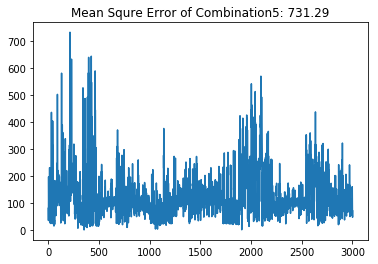

<Figure size 1152x648 with 0 Axes>

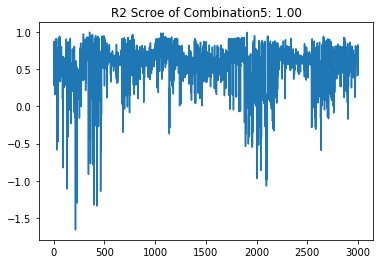

<Figure size 1152x648 with 0 Axes>

In [113]:
get_linear_regression_with_combination(5, x_data, y_data)

In [114]:
all_qsar_df

,qsar_equations,r2_vals,mse_vals,c_vals
15,y = ALogP * -66.10 + AATS4m * 14.94 + AATS4v *...,0.996767,0.888596,0-2-4-6-10
14,y = AATS3m * -11.27 + AATS4m * 8.98 + AATS4v *...,0.983401,4.562116,1-2-4-5
13,y = ALogP * -22.62 + AATS4v * 4.95 + ETA_dBeta...,0.920648,21.809131,0-4-12-13
12,y = ALogP * -20.14 + AATS4m * 3.45 + nHaaCH * ...,0.911531,24.314969,0-2-8-12
11,y = ALogP * 1.09 + AATS4m * 4.51 + AATS3v * -1...,0.907857,25.324542,0-2-3-14
2,y = ALogP * 27.51 + AATS3m * -17.25 + AATS4m *...,0.900919,27.231590,0-1-2-5
8,y = ALogP * -46.09 + AATS3m * 0.97 + AATS4m * ...,0.852290,40.596753,0-1-2-11
9,y = ALogP * 23.33 + AATS3m * -15.86 + AATS4m *...,0.831613,46.279456,0-1-2-12
0,y = ALogP * 4.26 + AATS3m * -4.27 + AATS4m * 2...,0.704550,81.201661,0-1-2-3
6,y = ALogP * -0.19 + AATS3m * -8.16 + AATS4m * ...,0.589304,112.875871,0-1-2-9


In [116]:
get_optimized_qsar_equation(2)

qsar_equations    y = ALogP * -66.10 + AATS4m * 14.94 + AATS4v *...
r2_vals                                                    0.996767
mse_vals                                                   0.888596
c_vals                                                   0-2-4-6-10
Name: 15, dtype: object
qsar_equations    y = AATS3m * -11.27 + AATS4m * 8.98 + AATS4v *...
r2_vals                                                    0.983401
mse_vals                                                    4.56212
c_vals                                                      1-2-4-5
Name: 14, dtype: object


In [124]:
all_qsar_df['qsar_equations'].values[0]

'y = ALogP * -66.10 + AATS4m * 14.94 + AATS4v * -13.79 + C1SP3 * 20.27 + LipoaffinityIndex * 30.62 + 1048.83'

Coefficients:  [[-66.09560176  14.94118875 -13.79138921  20.27422589  30.61607409]]
bias:  [1048.83195701]
Mean squared error: 0.89
R²: 1.00
== Train Data 
[[ -1.9277      50.6274802  165.7353125    3.           9.29207043]
 [ -2.0142      50.25272989 165.1653811    3.          10.04385356]
 [ -2.617       50.29914594 165.0441001    1.           9.41387351]
 [ -2.6517      47.62278757 159.8185504    1.          10.21796461]
 [ -2.1165      49.95585534 163.8102622    3.           9.17777789]
 [ -2.7035      48.30920037 162.4426532    1.          10.28635259]
 [ -1.2181      54.12453042 166.757736     3.          10.13513238]
 [ -1.2181      51.69526551 165.134775     3.          10.1406538 ]
 [ -2.0097      50.27999234 161.6319302    1.           9.48543061]
 [ -2.617       49.57851493 163.7040559    1.           9.48391089]
 [ -1.9074      52.87939282 164.6270623    1.          10.35637032]
 [ -2.0142      49.25907945 164.3397003    3.          10.07915566]]
== Test Data 
[[ -1.3204   

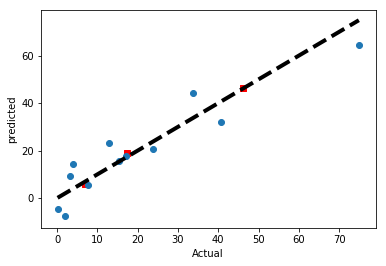

   Actual  Predicted
0    6.87   6.129393
1   17.40  18.841213
2   46.10  46.300486


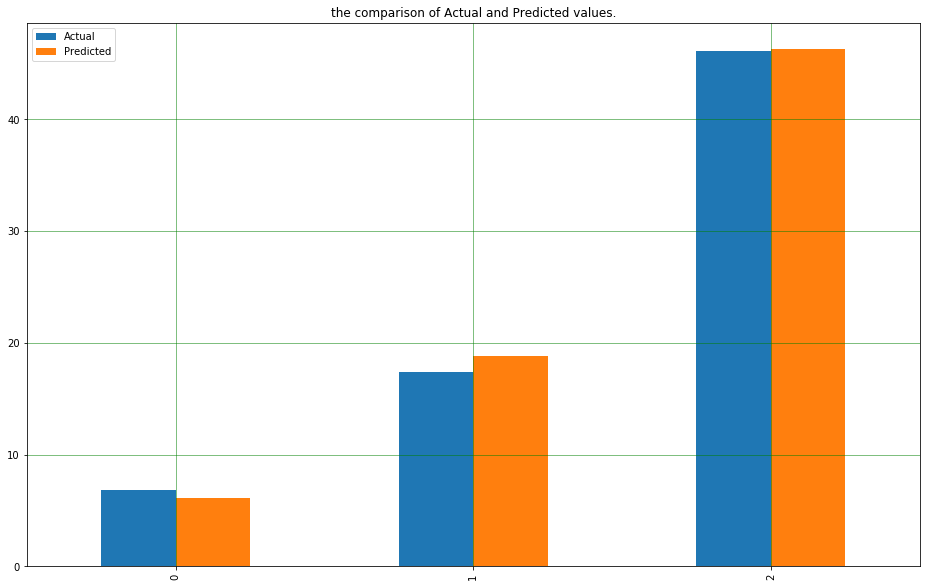

(array([1048.83195701]),
 array([[-66.09560176,  14.94118875, -13.79138921,  20.27422589,
          30.61607409]]),
 0.8885962175162719,
 0.9967668648944302)

In [123]:
c_list = get_to_c_vals(all_qsar_df['c_vals'].values[0])
#get_linear_regresion_with_plot(x_data[:,[x for x in c_list]], y_data)
get_linear_regresion_with_plot(x_data[:,c_list], y_data)

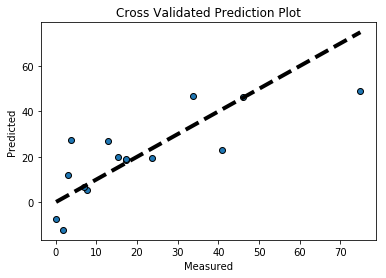

In [118]:
list_of_selection = get_to_c_vals(all_qsar_df['c_vals'].values[0])
list_of_selection
# x_data[:,[a,b,c,d, e]], y_data)

get_cross_validation(x_data[:,list_of_selection], y_data)

In [119]:
print(get_cross_validate(x_data[:,list_of_selection], y_data))

[-0.63820944 -2.7527779  -0.11625148]


In [122]:
get_kfold_validation(x_data[:,list_of_selection], y_data)

n_splits=3, cross validation score: [ 0.5010462  -0.84920987  0.70816364]
n_splits=5, cross validation score: [ 0.68619393  0.46335571 -2.64383182  0.16865518  0.82419658]
